## Telecom Churn Case Study 

##### Group Members: 
1. Roopesh Poojary
2. Vijayant Kumar

# **<font color='blue'>1. Understanding of Business</font>**

## 1.1 Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of `15-25% annual churn rate`. It costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is even more important than customer acquisition. 

## 1.2 Business Objective

To `reduce customer churn`, telecom companies need to predict which customers are at high risk of churn. The business objective is to predict the churn for prepaid customers in the last (i.e. the ninth) month using the data (features) from the first three months.

### 1.2.1 Customer behaviour during churn

Following customer behaviour is the basis of churn detection strategy.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, following three phases of customer lifecycle are considered

<font color='green'>**The ‘good’ phase**:</font> In this phase, the customer is happy with the service and behaves as usual.

<font color='orange'>**The ‘action’ phase**:</font> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

<font color='red'>**The ‘churn’ phase**:</font> In this phase, the customer is said to have churned. Churn is defined based on this phase.

### 1.2.2 Churn detection strategy

***High-value Churn*** : In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus with reduction of high-value customers churn, business will be able to reduce significant revenue leakage.

***Usage-based churn***: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time are termed as churned customers


#### Import Libraries and load data from CSV file

In [188]:
##Importing all the required libraris
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

###SKLearn modelling
from sklearn import model_selection, preprocessing,metrics
#from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split,KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import RFE # to calculate RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score,roc_auc_score,classification_report,balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import RUSBoostClassifier
from sklearn.svm import SVC
from scipy import stats

#import statsmodels.api as sm  
from collections import Counter

###XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')


In [189]:
# set the display parameters to show more rows and columns
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
telecom = pd.read_csv('telecom_churn_data.csv') # read the telecom customer data to dataframe

In [190]:
telecom.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [191]:
print("Shape of the DataFrame:",telecom.shape,"\n") ## (99999, 226) 
#telecom.info(max_cols=300)

Shape of the DataFrame: (99999, 226) 



In [192]:
HV_telecom=telecom.copy()

# **<font color='blue'>2. Data Understanding & Pre-processing</font>**

###  Check null and NaN values in each column

In [193]:
round((((HV_telecom.isnull() | HV_telecom.isna()).sum()/HV_telecom.shape[0])*100).sort_values(ascending=False),2).head(35)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### **<font color='green'> Analysis:</font>**
- Based on missing values, it seems there are huge set of customers who are not using below features and hence data is not available for their related columns:
1. **2g or 3g data** (i.e.: arpu_3g_6/7/8, count_rech_3g_6/7/8, arpu_2g_6/7/8, count_rech_2g_6/7/8, max_rech_data_6/7/8, total_rech_data_6/7/8, date_of_last_rech_data_6/7/8 etc...)
2. **fb** (fb_user_6/7/8)
3. **Night pack** (night_pck_user_6/7/8)

In [194]:
HV_telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### **<font color='blue'>Definition of the Common Reusable functions </font>**

**dist_prob_plot**: This function is used to plot Distribution plots <br>
**mscatterplot**: This Function is to draw Scatterplots for all the columns provided for a dataframe<br>
**datarech_col_validation**: This function is to validate data columns for average and max values<br>

In [195]:
# Distribution Plots
def dist_prob_plot(feature_name,all_months=False):
    '''
    Function for Distribution and Probability Plots 
    Parameters: feature_name which needs to be analyzed
    Returns: Distibution Plot and Probabilty Plot
    '''
    plt.figure(figsize=(25,4))
    
    ###6th Month
    plt.subplot(1,6,1)
    sns.distplot(HV_telecom[feature_name].dropna() ,kde=False, fit=stats.norm)
    plt.title(feature_name + ' - ' + 'Distribution Plot')
    plt.subplot(1,6,2)
    _=stats.probplot(HV_telecom[feature_name].dropna(), plot=plt)
    plt.title(feature_name + ' - ' + 'Probabiity Plot')
    
    ###7th Month
    new_f = feature_name[:-2]+'_7'
    plt.subplot(1,6,3)
    sns.distplot(HV_telecom[new_f].dropna(),kde=False , fit=stats.norm)
    plt.title(new_f + ' - ' + 'Distribution Plot')
    plt.subplot(1,6,4)
    _=stats.probplot(HV_telecom[new_f].dropna(), plot=plt)
    plt.title(new_f + ' - ' + 'Probabiity Plot')
    
    ###8th Month
    new_f = feature_name[:-2]+'_8'
    plt.subplot(1,6,5)
    sns.distplot(HV_telecom[new_f].dropna(),kde=False , fit=stats.norm)
    plt.title(new_f + ' - ' + 'Distribution Plot')
    plt.subplot(1,6,6)
    _=stats.probplot(HV_telecom[new_f].dropna(), plot=plt)
    plt.title(new_f + ' - ' + 'Probabiity Plot')
    
    plt.tight_layout()
    plt.show()
    
##*************************************************************************************************************************************##    
    
def mscatterplot(df,x_colname,y_colname,hue_colname,pltnum,listlen):
    '''
    Function is to draw Scatterplots for all the columns provided for a dataframe
    Parameters:
    -df: Dataframe name
    -x_colname: Column Name for X-axis
    -y_colname: Column Name for y-axis
    -hue-colname: Column Name for hue
    -pltnum: Plot Number
    -listlen: Total length of list
    
    Returns: None
    '''
    coln = 5
    rown = listlen//coln + 1
    plt.subplot(rown,coln,pltnum)
    #sns.boxplot(x = x_colname, y = y_colname, data = df)
    #sns.jointplot(x = x_colname, y = y_colname, data = df)
    sns.scatterplot(x = x_colname, y=y_colname,hue = hue_colname, data = df)
    plt.xticks(rotation=45)   
    #plt.tight_layout()
    #plt.show()
    
##*************************************************************************************************************************************##  

def datarech_col_validation(df,col1,col2,col3):
    '''
    Function is to validate data columns for average and max values
    Parameters:
    - df: Dataframe
    - col1, col2: Two columns which need to be compared for values
    - col3: Extra column to use to display relavent information
    '''
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for l in range(0,len(df[col1])):
        if df[col1][l] > df[col2][l]:
            count_1+=1
        elif df[col1][l] < df[col2][l]:
            count_2+=1
            #if count_2 == 10:
            #    print(col1," : ",df[col1][l])
            #    print(col2," : ",df[col2][l])
            #    print(col3," : ",df[col3][l])
        elif df[col1][l] == df[col2][l]:
            count_3+=1
            
    print("Count of", col1, " > " , col2 , ":" ,count_1)
    print("Count of", col1, " < " , col2 , ":" ,count_2)
    print("Count of", col1, " = " , col2 , ":" ,count_3)
    
    
##*************************************************************************************************************************************## 
def model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred):
    '''
    Function is used for model evaluation using common scoring metrics
    y_train, y_train_ped : Actual and predicted values of training set
    y_test,y_test_pred : Actual and predicted values of test set
    
    '''
    
    print('\n------------Recall/Sensitivity (Churn Prediction Accuracy) score------------')
    print('train set:', round(recall_score(y_train, y_train_pred),3))
    print('Test set:',  round(recall_score(y_test, y_test_pred),3))

    print('\n------------Specificity (Non Churn Prediction Accuracy) score------------')
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_train_pred).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_test_pred).ravel()
    print('train set:', round((tn1/(tn1+fp1)),3))
    print('test set:', round((tn2/(tn2+fp2)),3))
        
    print('\n------------Precision score------------')
    print('train set:', round(precision_score(y_train, y_train_pred),3))
    print('test set:',  round(precision_score(y_test, y_test_pred),3))
    
    print('\n------------F1 score------------')
    print('train set:', round(f1_score(y_train, y_train_pred),3))
    print('test set:',  round(f1_score(y_test, y_test_pred),3))
    
    print('\n------------Accuracy score------------')
    print('train set:', round(accuracy_score(y_train, y_train_pred),3))
    print('Test set:',  round(accuracy_score(y_test, y_test_pred),3))
    
    print('\n------------Confusion Matrix------------')
    
    plt.figure(figsize=(8, 2))    
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred, normalize='true'), annot=True, cbar=False)
    plt.ylabel('Actual churn')   
    plt.xlabel('Predicted churn')
    plt.title('Training set')
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred, normalize='true'), annot=True, cbar=False)
    plt.ylabel('Actual churn')   
    plt.xlabel('Predicted churn')
    plt.title('Test set')

## 2.1 Filter high-value customers:
- high-value customers: Those who have recharged with an amount more than or equal to X, where X is the `70th percentile` of the `average recharge amount` in the first two months (the good phase).
- After filtering the high-value customers, you should get about 29.9k rows.

**Assumption:**
- We need to take 70th percentile of average of `total_rech_amt_6`+`total_rech_amt_7` to find High value customers

In [196]:
# calculate the 70th percentile of average(month_6 and month_7) total recharge amount 
quantile_70 = pd.DataFrame((HV_telecom['total_rech_amt_6'] + HV_telecom['total_rech_amt_7'])/2).quantile(0.7)[0]
print("70th Percentile:", quantile_70)

#Filter high value customers with avaerage recharge amount greater than or equal to 70th percentille
HV_HV_telecom = HV_telecom.loc[(HV_telecom['total_rech_amt_6'] + HV_telecom['total_rech_amt_7'])/2 >= quantile_70]
print(HV_HV_telecom.shape)

### Checking total revenue being generated by High value customers###
print("Total revenue generated by high value customers (based on call rech amount) %:",
                  round((sum(HV_HV_telecom['total_rech_amt_6']+HV_HV_telecom['total_rech_amt_7'] + HV_HV_telecom['total_rech_amt_8']))/
                        (sum(HV_telecom['total_rech_amt_6']+HV_telecom['total_rech_amt_7'] + HV_telecom['total_rech_amt_8']))*100,2))

print("Total revenue generated by high value customers (based on arpu amount) %:",
                  round((sum(HV_HV_telecom['arpu_6']+HV_HV_telecom['arpu_7'] + HV_HV_telecom['arpu_8']))/
                        (sum(HV_telecom['arpu_6']+HV_telecom['arpu_7'] + HV_telecom['arpu_8']))*100,2))

70th Percentile: 368.5
(30011, 226)
Total revenue generated by high value customers (based on call rech amount) %: 61.8
Total revenue generated by high value customers (based on arpu amount) %: 61.09


## 2.2 Tag churners:

To tag the churned customers (`churn=1, else 0`) use the fourth month of data as follows: 

1. Those who have not made any calls (either incoming or outgoing) AND 
2. Have not used mobile internet even once in the churn phase. 

The attributes used to tag churners are: `total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9`

In [197]:
HV_telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  99999 non-null  float64
 1   total_og_mou_9  99999 non-null  float64
 2   vol_2g_mb_9     99999 non-null  float64
 3   vol_3g_mb_9     99999 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [198]:
##Assign '1' to the customers having no usage (as per above condition) in 9th month
HV_telecom.loc[((HV_telecom['total_ic_mou_9']== 0) & (HV_telecom['total_og_mou_9']== 0)) & 
                (HV_telecom['vol_2g_mb_9']   == 0) & (HV_telecom['vol_3g_mb_9']   == 0),'churn'] = 1

##Assign '0' to the remaining customers 
HV_telecom['churn'].fillna(0,inplace=True)

print("Churn ratio: ",round(HV_telecom['churn'].value_counts()[1]/HV_telecom['churn'].count()*100,2))

Churn ratio:  10.19


### Verify `arpu`, `arpu_3g_9` and `arpu_2g_9` values for churned customers is almost zero

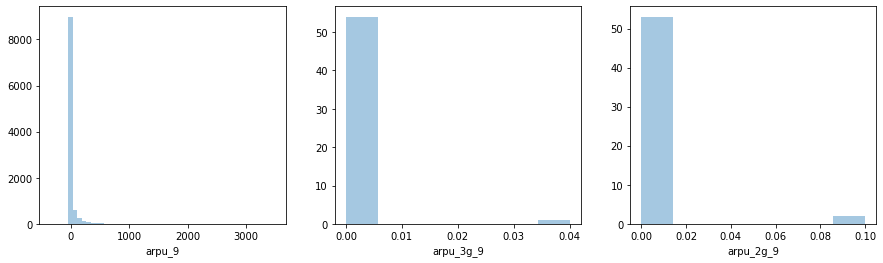

In [199]:
HV_telecom_9 = HV_telecom[['churn','arpu_9','arpu_3g_9','arpu_2g_9']]
HV_telecom_9 = HV_telecom_9.loc[(HV_telecom_9['churn'] == 1)]

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(HV_telecom_9['arpu_9'].dropna(),kde=False)
plt.subplot(1,3,2)
sns.distplot(HV_telecom_9['arpu_3g_9'].dropna(),kde=False)
plt.subplot(1,3,3)
sns.distplot(HV_telecom_9['arpu_2g_9'].dropna(),kde=False)
plt.show()

## 2.3 Remove attributes of the churn phase
- Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [200]:
columns_9 = [col for col in HV_telecom.columns if ('_9' in col)]
columns_9.append('sep_vbc_3g')  ## Adding it seprately as it doesn't have _9
HV_telecom.drop(columns=columns_9,inplace=True)
HV_telecom.shape

(99999, 172)

# **<font color='blue'> 3. Data Cleanup</font>**

## 3.1 Check unique values of all the columns and identify if any columns can be dropped

In [201]:
#HV_telecom.nunique().sort_values(ascending=True).index
uni_val = pd.DataFrame(HV_telecom.nunique().sort_values(ascending=True)).reset_index()
uni_val.columns = ['column_name','unique_values']

categorical_featurelist = uni_val.loc[uni_val['unique_values']<20]['column_name'].to_list()

In [202]:
for f in categorical_featurelist:
    print(100*HV_telecom[f].value_counts(normalize=True,dropna=False))
    print('\n')    

0.0    96.062961
NaN     3.937039
Name: std_ic_t2o_mou_6, dtype: float64


109    100.0
Name: circle_id, dtype: float64


0.0    98.98199
NaN     1.01801
Name: loc_og_t2o_mou, dtype: float64


0.0    98.98199
NaN     1.01801
Name: std_og_t2o_mou, dtype: float64


0.0    98.98199
NaN     1.01801
Name: loc_ic_t2o_mou, dtype: float64


6/30/2014    100.0
Name: last_date_of_month_6, dtype: float64


7/31/2014    99.398994
NaN           0.601006
Name: last_date_of_month_7, dtype: float64


8/31/2014    98.899989
NaN           1.100011
Name: last_date_of_month_8, dtype: float64


0.0    94.621946
NaN     5.378054
Name: std_ic_t2o_mou_8, dtype: float64


0.0    94.621946
NaN     5.378054
Name: std_og_t2c_mou_8, dtype: float64


0.0    96.140961
NaN     3.859039
Name: std_og_t2c_mou_7, dtype: float64


0.0    96.062961
NaN     3.937039
Name: std_og_t2c_mou_6, dtype: float64


0.0    96.140961
NaN     3.859039
Name: std_ic_t2o_mou_7, dtype: float64


NaN    74.846748
0.0    24.522245
1.0     0.

### Below columns have only one value (or NaN) for all the rows so dropping them

'std_ic_t2o_mou_6', 'std_og_t2c_mou_8','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
'std_og_t2c_mou_7', 'last_date_of_month_8', 'std_og_t2c_mou_6','last_date_of_month_6',
'loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','circle_id','last_date_of_month_7'

In [203]:
list(HV_telecom.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_o

In [204]:
cols_to_drop = ['std_ic_t2o_mou_6', 'std_og_t2c_mou_6','std_ic_t2o_mou_7','std_og_t2c_mou_7',
                'std_ic_t2o_mou_8','std_og_t2c_mou_8','std_og_t2o_mou',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'loc_ic_t2o_mou','loc_og_t2o_mou','circle_id','mobile_number']

HV_telecom.drop(columns=cols_to_drop,inplace=True)
HV_telecom.shape

(99999, 158)

## 3.2 Check column names consistency

In [205]:
## Rename below columns for consistency purpose
HV_telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                             'jul_vbc_3g':'vbc_3g_7',
                             'aug_vbc_3g':'vbc_3g_8',}, inplace=True)

##### `av_rech_amt_data_6/7/8` columns look like total recharge amount for data and `max_rech_data_6/7/8` columns look like max recharge amount for data so renaming the same

## 3.3 Impute missing values
- Impute numerical values with 0 for Numerical columns
- Impute 0 as new category for Categorical columns (and will drop this new category during Dummy creation)

#### Below columns are categorical columns:
1. night_pck_user_6, night_pck_user_7, night_pck_user_8
2. fb_user_6, fb_user_7, fb_user_8
3. monthly_3g_6, monthly_3g_7, monthly_3g_8 
4. monthly_2g_6, monthly_2g_7, monthly_2g_8

In [206]:
night_pck_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
HV_telecom[night_pck_cols] = HV_telecom[night_pck_cols].fillna(value=0, axis=1) ## Nan is corresponding to users not using night pack

fb_user_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']
HV_telecom[fb_user_cols] = HV_telecom[fb_user_cols].fillna(value=0, axis=1) ## Nan is corresponding to users not using fb 

# No nan's present in monthly_2g/3g
monthly_2g_3g_cols = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']

columns_cat = night_pck_cols + fb_user_cols + monthly_2g_3g_cols

In [207]:
# Segregate continous features for the month of June, July and August
columns_6 = [col for col in HV_telecom.columns if ('6' in col and 'date' not in col and col not in columns_cat)]
columns_7 = [col for col in HV_telecom.columns if ('7' in col and 'date' not in col and col not in columns_cat)]
columns_8 = [col for col in HV_telecom.columns if ('8' in col and 'date' not in col and col not in columns_cat)]

# Imputing nan with for continous features
HV_telecom[columns_6] = HV_telecom[columns_6].fillna(0)
HV_telecom[columns_7] = HV_telecom[columns_7].fillna(0)
HV_telecom[columns_8] = HV_telecom[columns_8].fillna(0)

columns_cat_new = ['night_pck_user','fb_user','monthly_2g','monthly_3g']

## 3.4 Outlier removal

In [208]:
display(HV_telecom.describe([0.5,0.75,0.95,0.99,0.995,0.998]))

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     282.987358    278.536648    279.154731    127.183397    128.512397   
std      328.439770    338.156291    344.474791    292.433718    303.869995   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
50%      197.704000    191.640000    192.080000     30.980000     29.230000   
75%      371.060000    365.344500    369.370500    112.610000    108.880000   
95%      829.488200    828.357200    833.303300    594.285000    607.158000   
99%     1410.792540   1428.685880   1455.539960   1410.511400   1463.311600   
99.5%   1726.672790   1736.969920   1772.514510   1837.740300   1894.673200   
99.8%   2240.240696   2213.503668   2244.028424   2542.154080   2577.341440   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.000000   
mean     125.864313    190.142776    189.441086    186.002904       9.558277   
std      302.023240    312.928229    321.759659    321.325854      71.403643   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
50%       28.040000     89.680000     85.440000     83.130000       0.000000   
75%      106.740000    222.535000    217.830000    215.500000       0.000000   
95%      594.812000    712.595000    727.457000    712.352000      38.562000   
99%     1452.734200   1517.047400   1524.160600   1495.840400     213.813400   
99.5%   1915.615500   1942.244000   1977.096900   1933.611700     338.060000   
99.8%   2589.145680   2567.336240   2720.025680   2604.416320     547.080640   
max    10752.560000   8362.360000   9667.130000  14007.340000   13724.380000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean        6.873981       6.900761      13.363643       9.439823   
std        72.029965      66.558003      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        21.490000      22.381000      65.412000      40.783000   
99%       149.130600     155.011600     281.115400     215.685000   
99.5%     263.381600     272.190500     429.038300     344.191000   
99.8%     477.815680     459.140360     675.830400     593.265880   
max     15371.040000   13095.360000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   99999.000000      99999.000000      99999.000000      99999.000000   
mean        9.435597         45.246387         44.679599         43.419935   
std        62.989180        148.140370        152.555137        147.427075   
min         0.000000          0.000000          0.000000          0.000000   
50%         0.000000         10.680000         10.430000         10.030000   
75%         0.000000         38.820000         37.890000         37.360000   
95%        38.831000        172.694000        171.010000        169.335000   
99%       214.512600        537.691800        526.647400        511.301400   
99.5%     336.442200        846.436300        857.047200        795.805900   
99.8%     581.781920       1433.958680       1515.861520       1391.535880   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          89.667174         87.870081         86.820488          3.603334   
std          160.573349        155.423787        153.669894         13.966557   
min          

In [209]:
HV_quantile= {}
for col in columns_6+columns_7+columns_8:
    HV_quantile[col] = HV_telecom[col].quantile(0.998)

#HV_quantile
for col in columns_6+columns_7+columns_8:

    HV_telecom = HV_telecom.loc[HV_telecom[col] <= HV_quantile[col]]
    #print(HV_telecom.shape)
    
display(HV_telecom.describe([0.5,0.75,0.95,0.99]))


HV_telecom.reset_index(inplace=True)

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  90066.000000  90066.000000  90066.000000  90066.000000  90066.000000   
mean     247.749691    241.256988    243.126008    108.635699    108.370239   
std      227.747073    226.066763    232.039621    217.102396    221.891292   
min     -160.795000   -282.788000   -345.129000      0.000000      0.000000   
50%      185.330000    178.087000    179.497500     29.060000     27.180000   
75%      339.999000    332.306500    337.755500    103.340000     99.110000   
95%      704.692250    693.913750    701.371000    521.810000    532.237500   
99%     1044.026400   1036.816000   1063.941400   1129.514500   1151.815000   
max     2219.943000   2174.552000   2160.659000   2437.710000   2389.260000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  90066.000000  90066.000000  90066.000000  90066.000000   90066.000000   
mean     107.321418    166.280192    163.777567    162.029451       6.671848   
std      222.991721    238.772458    240.005362    239.242834      31.354455   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
50%       26.310000     84.410000     79.890000     78.170000       0.000000   
75%       98.110000    204.775000    199.555000    197.632500       0.000000   
95%      528.207500    618.452500    629.302500    620.525000      32.455000   
99%     1153.980000   1197.410500   1190.005500   1186.097500     158.097000   
max     2585.590000   2454.340000   2644.930000   2571.030000     542.960000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   90066.000000   90066.000000   90066.000000   90066.000000   
mean        4.168106       4.305230      10.192640       6.616010   
std        22.881578      23.775498      43.001008      32.246046   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        17.530000      17.830000      57.075000      34.125000   
99%       106.275000     110.177500     224.085000     160.404500   
max       476.590000     456.640000     674.930000     593.260000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   90066.000000      90066.000000      90066.000000      90066.000000   
mean        6.433138         37.617414         36.609530         35.940549   
std        31.907828         88.351195         86.394403         83.380099   
min         0.000000          0.000000          0.000000          0.000000   
50%         0.000000         10.160000          9.910000          9.590000   
75%         0.000000         36.560000         35.590000         35.380000   
95%        31.770000        156.260000        153.275000        151.667500   
99%       159.447000        426.942500        415.714000        408.775500   
max       574.560000       1433.940000       1515.860000       1383.110000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count      90066.000000      90066.000000      90066.000000      90066.000000   
mean          81.035550         79.279166         78.675048          2.931768   
std          124.898088        122.036399        122.009800          8.475460   
min            0.000000          0.000000          0.000000          0.000000   
50%           36.460000         35.810000         34.790000          0.000000   
75%          100.730000         98.160000         98.290000          1.690000   
95%          316.865000        310.907500        310.220000         15.980000   
99%          619.820500        607.883500        603.407500         43.297000   
max         1366.080000       1271.440000       1278.590000        117.860000   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      90066.000000      90066.000000      90066.0000

In [210]:
round((((HV_telecom.isnull() | HV_telecom.isna()).sum()/HV_telecom.shape[0])*100).sort_values(ascending=False),2).head(35)

date_of_last_rech_data_6    76.49
date_of_last_rech_data_7    76.15
date_of_last_rech_data_8    75.31
date_of_last_rech_8          3.74
date_of_last_rech_7          1.85
date_of_last_rech_6          1.69
total_og_mou_6               0.00
og_others_8                  0.00
og_others_7                  0.00
og_others_6                  0.00
churn                        0.00
total_og_mou_8               0.00
spl_og_mou_8                 0.00
spl_og_mou_7                 0.00
spl_og_mou_6                 0.00
isd_og_mou_8                 0.00
isd_og_mou_7                 0.00
isd_og_mou_6                 0.00
std_og_mou_8                 0.00
total_og_mou_7               0.00
loc_ic_t2t_mou_6             0.00
std_ic_t2f_mou_8             0.00
loc_ic_t2t_mou_7             0.00
std_ic_t2f_mou_6             0.00
std_ic_t2m_mou_8             0.00
std_ic_t2m_mou_7             0.00
std_ic_t2m_mou_6             0.00
std_ic_t2t_mou_8             0.00
std_ic_t2t_mou_7             0.00
std_ic_t2t_mou

# **<font color='blue'>4. Derive new features </font>**

## 4.1 Delta/diff feature and trend feature for all continous features

Following set of new features are derived for all continous variables
  -  A `delta/diff` feature is calculated by subtracting the average of a feature in good phase from the corresponding feature in action pahse, it will help to understand if there is any significant decline in mou, recharge or pack usage etc.
  - A `trend` features is calculated for capturing the usage trend from corresponding delta/diff feature

In [211]:
columns_cat_trend = []
HV_telecom_diff = pd.DataFrame()
for col in range (0,len(columns_6)):
    new_col = columns_6[col][:-2]+'_diff'
    HV_telecom_diff[new_col] = HV_telecom[columns_8[col]] - (HV_telecom[columns_6[col]] + HV_telecom[columns_7[col]])/2
    new_col_trend = columns_6[col][:-2]+'_trend'
    HV_telecom_diff[new_col_trend] = HV_telecom_diff[new_col].apply(lambda x: 1 if x>=0 else 0)
    columns_cat_trend.append(new_col_trend)

## 4.2 Night pack, FB user, monthly_2g and monthly_3g
- Derive categories by subtractking the average of good phase from the corresponding feature in action phase and check if value is <0, 0 or >0 and assign category accordingly.

In [212]:
# checking the user behaviour between good and action phase, when usage reduces in the action phase , customers are likely to churn
HV_telecom['night_pck_user'] = HV_telecom.night_pck_user_8 - (HV_telecom.night_pck_user_6 + HV_telecom.night_pck_user_7)/2
# mapping the usage trend 0:k No change 1: increase in usage and -1: decrease in usage
HV_telecom['night_pck_user'] = HV_telecom.night_pck_user.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))

# checking the user behaviour between good and action phase, when usage reduces in the action phase , customers are likely to churn
HV_telecom['fb_user'] = HV_telecom.fb_user_8 - (HV_telecom.fb_user_6 + HV_telecom.fb_user_7)/2
# mapping the usage trend 0: No change 1: increase in usage -1: decrease in usage
HV_telecom['fb_user'] = HV_telecom.fb_user.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))

HV_telecom['monthly_2g'] = HV_telecom.monthly_2g_8 - (HV_telecom.monthly_2g_6 + HV_telecom.monthly_2g_7)/2
HV_telecom['monthly_2g'] = HV_telecom.monthly_2g.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))

HV_telecom['monthly_3g'] = HV_telecom.monthly_3g_8 - (HV_telecom.monthly_3g_6 + HV_telecom.monthly_3g_7)/2
HV_telecom['monthly_3g'] = HV_telecom.monthly_3g.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))


HV_telecom.drop(columns=columns_cat,inplace=True)


## 4.3 Recency
- Create new columns to check `recency` of recharge for calls and data as below

In [213]:
cols_date = [cols for cols in HV_telecom.columns if 'date' in cols]
HV_telecom[cols_date] = HV_telecom[cols_date].apply(pd.to_datetime)

In [214]:
from datetime import datetime

# End of action phase(31-Aug-2014) is considered as basis for calculation of receny 
HV_telecom['date_of_last_rech_gp'] = HV_telecom[['date_of_last_rech_6', 'date_of_last_rech_7']].max(axis=1)
HV_telecom['recency_gp'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_gp']).dt.days)
# if no recharge is date is found then begin of good phase is considerd (least recency)
HV_telecom['recency_gp'].fillna((datetime(2014, 8, 31) - datetime(2014, 6, 1)).days, inplace=True)
HV_telecom['recency_ap'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_8']).dt.days)
# if the customer has not done recharge in action phase then last date from good phase is considered for recency
HV_telecom['recency_ap'].fillna(HV_telecom['recency_gp'], inplace=True)

HV_telecom['date_of_last_rech_data_gp'] = HV_telecom[['date_of_last_rech_data_6', 'date_of_last_rech_data_7']].max(axis=1)
# if no recharge is date is found then begin of good phase is considerd (least recency)
HV_telecom['recency_data_gp'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_data_gp']).dt.days)
HV_telecom['recency_data_gp'].fillna((datetime(2014, 8, 31) - datetime(2014, 6, 1)).days, inplace=True)
# if the customer has not done recharge in action phase then last date from good phase is considered for recency
HV_telecom['recency_data_ap'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_data_8']).dt.days)

HV_telecom['recency_data_ap'].fillna(HV_telecom['recency_data_gp'], inplace=True)

HV_telecom.drop(['date_of_last_rech_gp', 'date_of_last_rech_data_gp','date_of_last_rech_data_6', 'date_of_last_rech_data_7',
                'date_of_last_rech_data_8', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [215]:
HV_telecom.shape
#HV_telecom.info(max_cols=150)

(90066, 149)

# **<font color='blue'>5. Perform EDA </font>**

## 5.1 Univariate Analysis

### Churn Rate

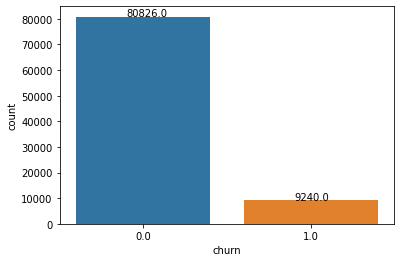

In [216]:
ax = sns.countplot(x=HV_telecom['churn'])

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

**<font color='green'>Analysis:</font>**
Churn rate has class imabalance so we need to handel this

### Average Revenue Per User (arpu)

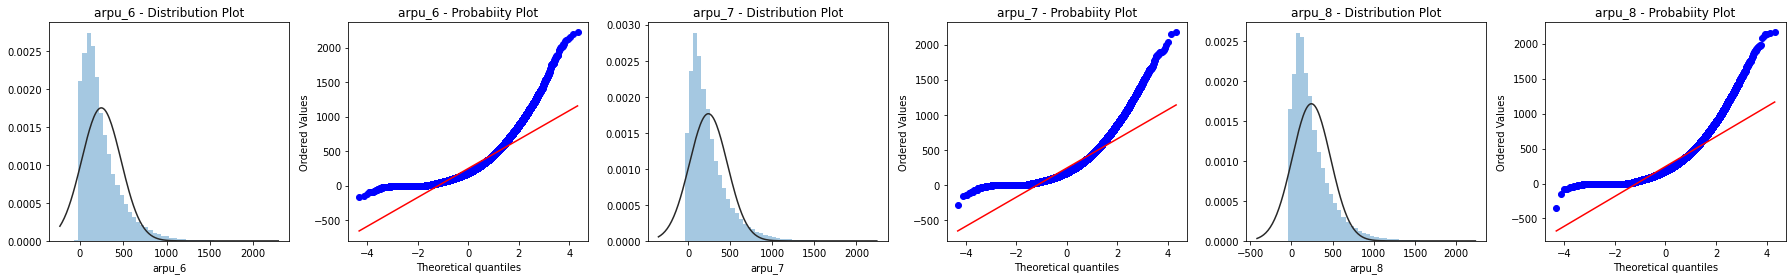

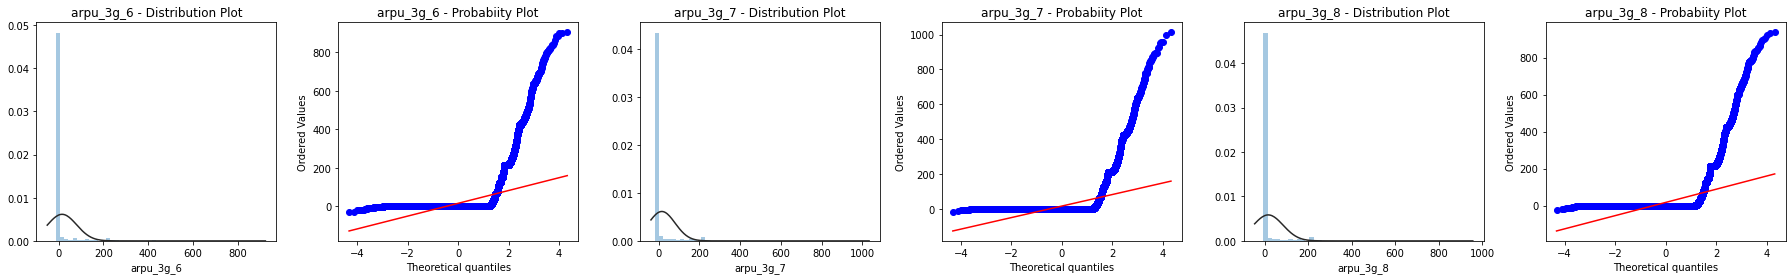

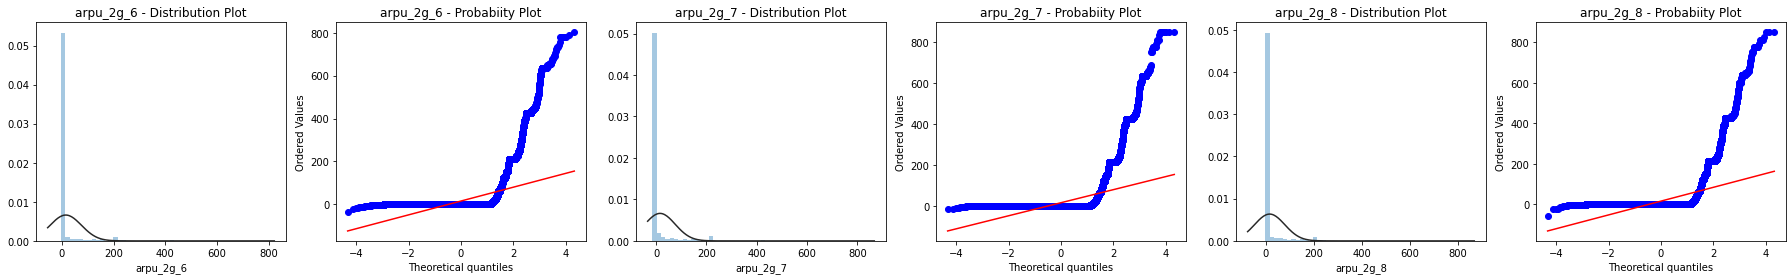

In [217]:
cols_arpu = [col for col in HV_telecom.columns if ('arpu' in col and '6' in col)]
for f in cols_arpu:
    dist_prob_plot(f)

**<font color='green'>Ananlysis:</font>**
- Based on distribution and probability plot for different **`arpu`**, we can see that there are many outliers with high value. We can consider them upper band of high value customers whom we have to retain.

### Recharge Amounts

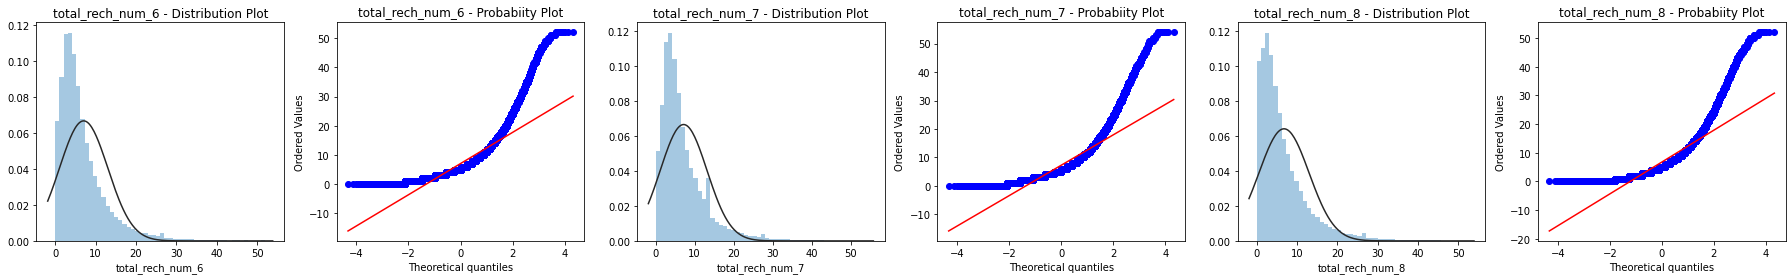

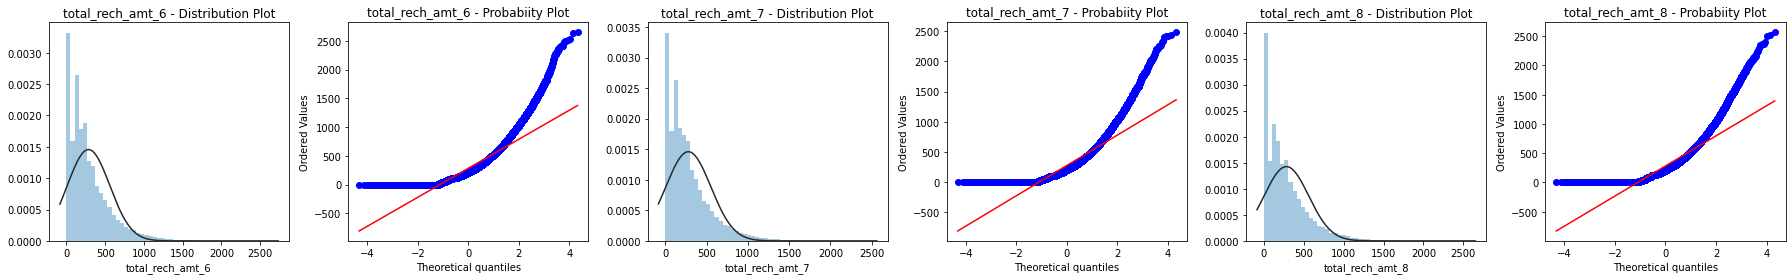

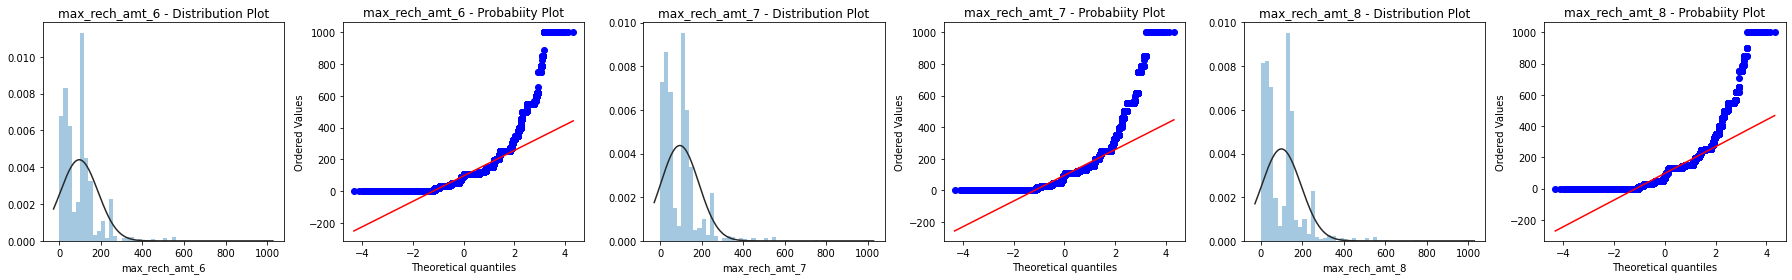

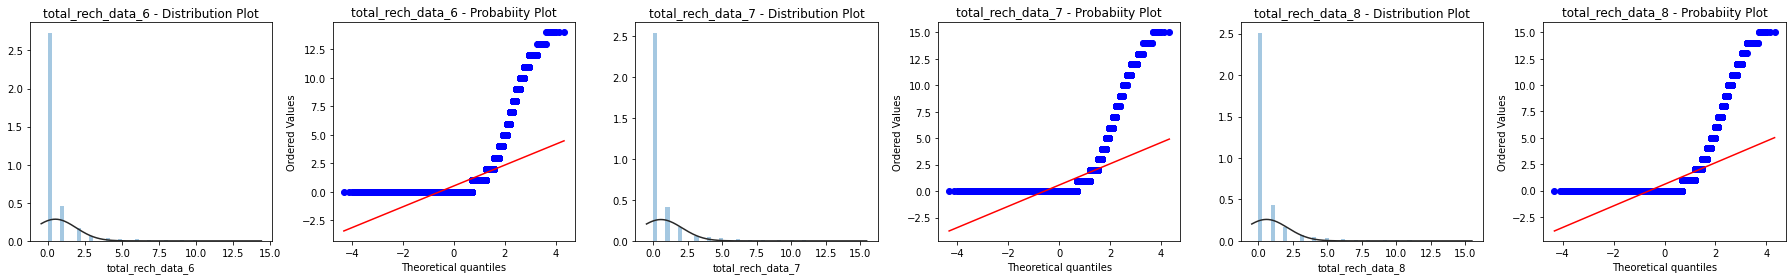

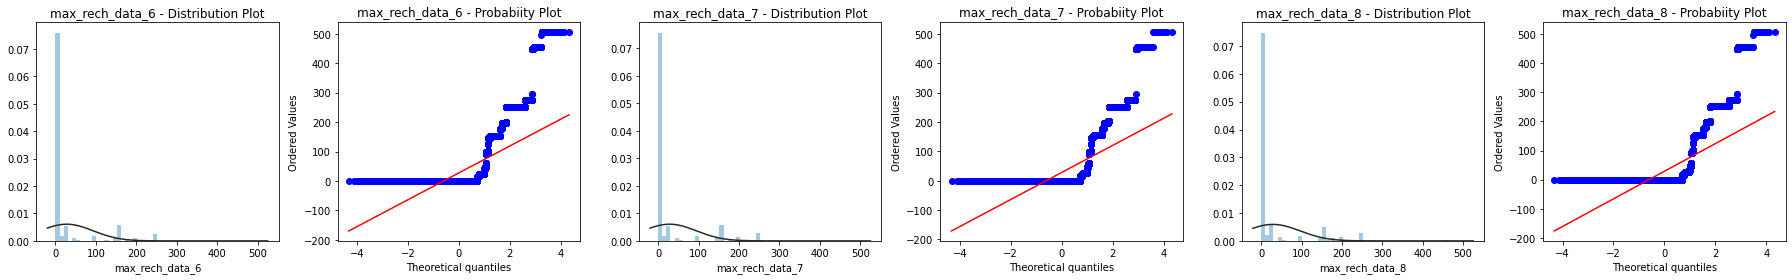

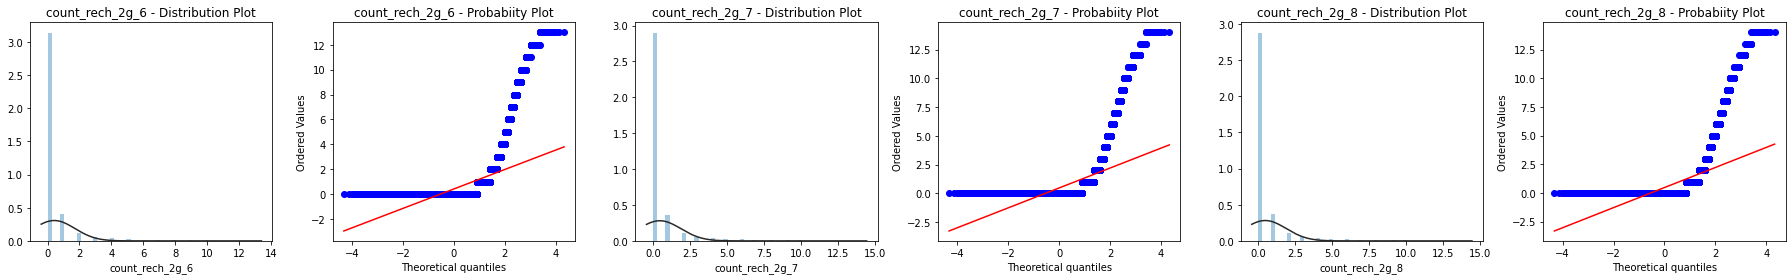

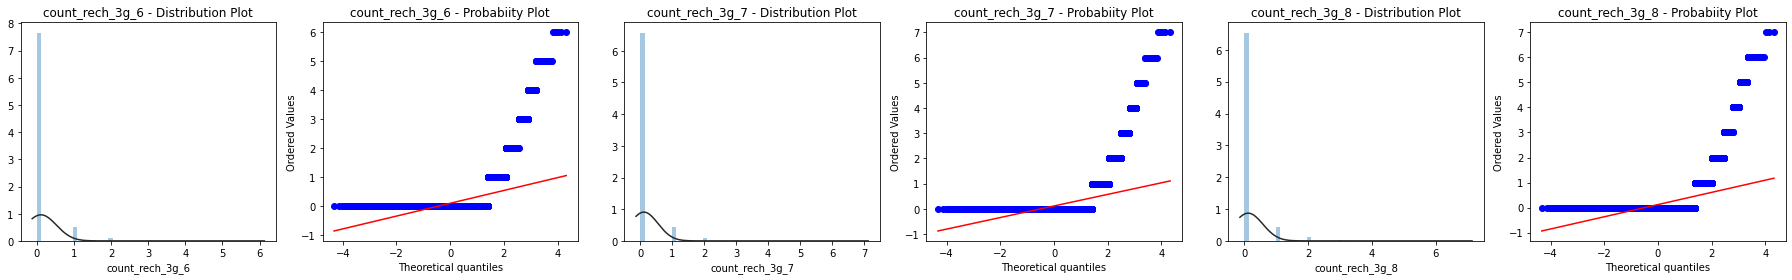

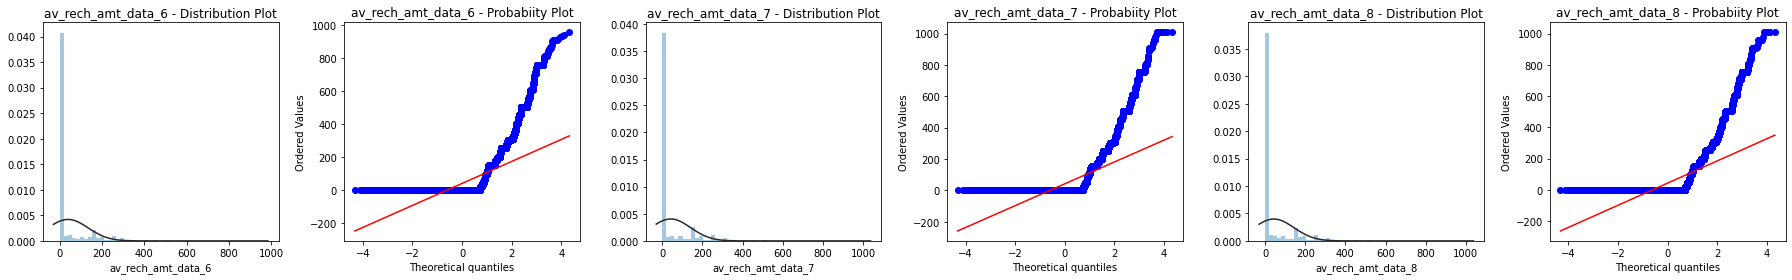

In [218]:
cols_rech = [col for col in HV_telecom.columns if ('rech' in col and '6' in col and 'date' not in col)]
#cols_rech
for f in cols_rech:
    dist_prob_plot(f)

#### MISC features - night, sachet, vbc

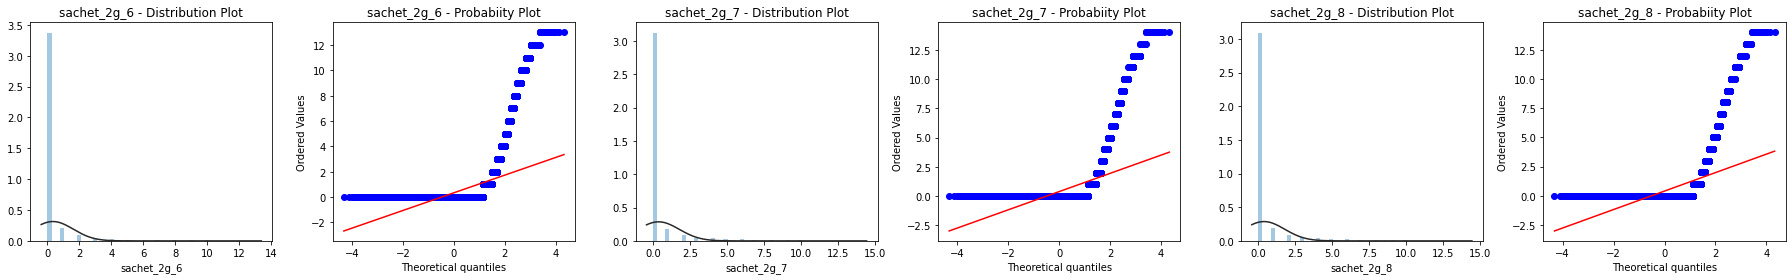

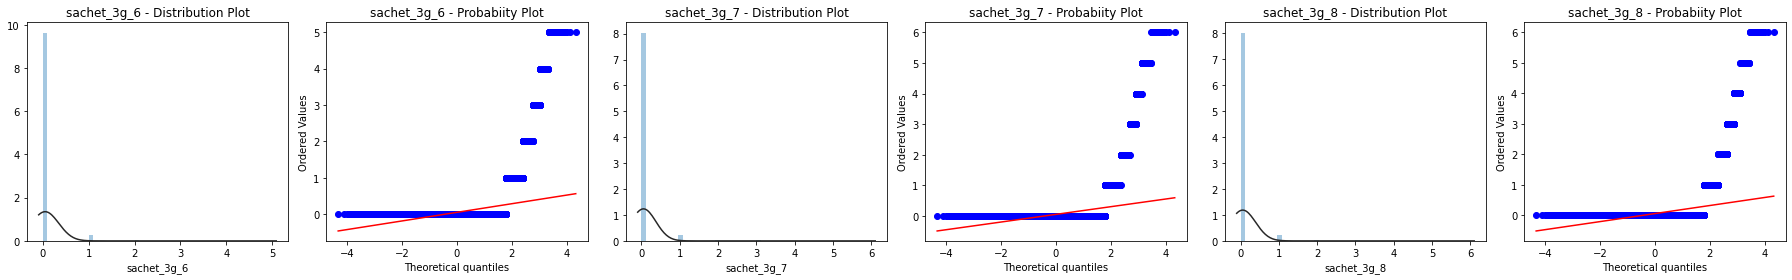

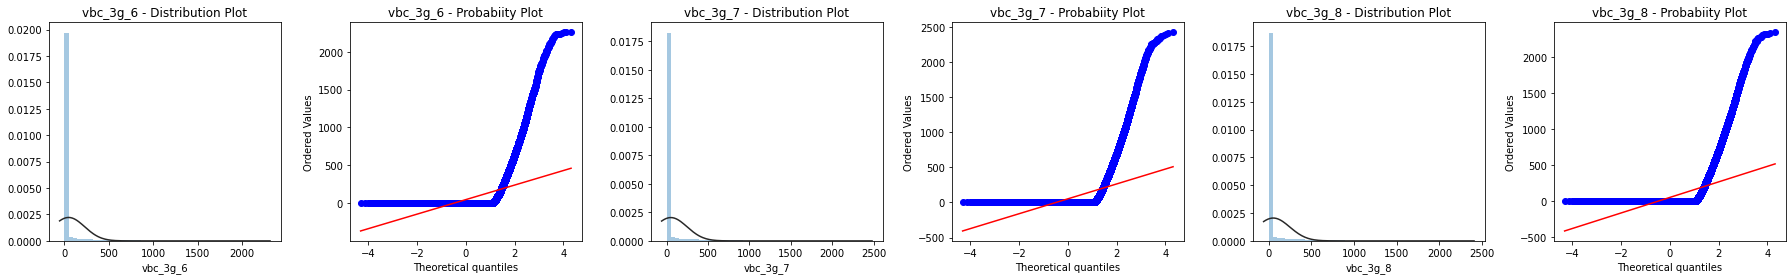

In [219]:
cols_misc = [col for col in HV_telecom.columns if (('night' in col or 'sachet' in col or 'vbc' in col) and '6' in col)]
#cols_misc
for f in cols_misc:
    dist_prob_plot(f)

**<font color='green'>Ananlysis:</font>**
- Based on distribution and probability plot for different misc features, we can see that there are many outliers with high value. There is a special set of customers using these features

## 5.2 Bivariate Analysis

### Define functions for Graphs and Plots

In [220]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(HV_telecom.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

In [221]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=HV_telecom.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

### Age on Network (aon)

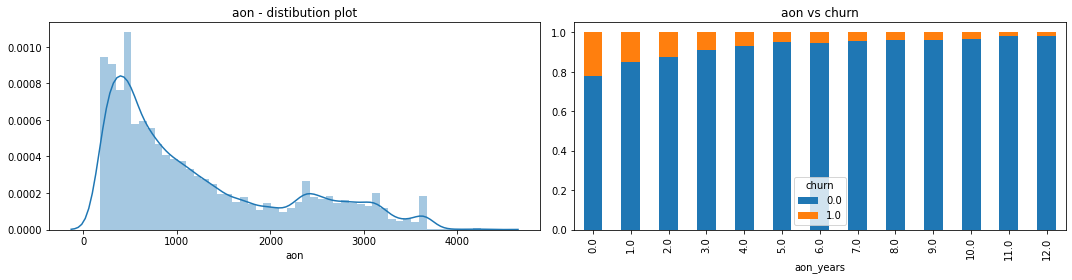

In [222]:
## As 'aon' is number of days, converting it into years for better analysis. Rounding of to nearest year number
HV_telecom['aon_years'] = round(HV_telecom['aon']/(30*12))

##Plot the data
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,2,1)
sns.distplot(HV_telecom['aon'],label='aon - distribution plot',ax=ax1)
plt.title('aon - distibution plot')
ax2 = plt.subplot(1,2,2)
pd.crosstab(HV_telecom.aon_years,HV_telecom.churn, normalize='index').plot(kind='bar',title='aon vs churn',ax=ax2,stacked=True)
plt.tight_layout()
plt.show()

HV_telecom.drop(columns='aon_years',inplace=True)

### Recency

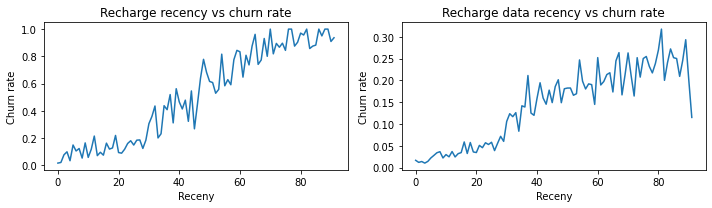

In [223]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
curn_rate = pd.crosstab(HV_telecom.recency_ap,HV_telecom.churn, normalize='index')
plt.xlabel('Receny')
plt.ylabel('Churn rate')
plt.title('Recharge recency vs churn rate')
plt.plot(curn_rate[1.0])

plt.subplot(1,2,2)
curn_rate = pd.crosstab(HV_telecom.recency_data_ap,HV_telecom.churn, normalize='index')
plt.xlabel('Receny')
plt.ylabel('Churn rate')
plt.title('Recharge data recency vs churn rate')
plt.plot(curn_rate[1.0])

plt.tight_layout()
plt.show()

**<font color='green'>Analysis:</font>** **churn rate** is high if recharge is done long time ago in `Good phase`

### Night pack, Fb usage, monthly 2g and 3g trend on Churn

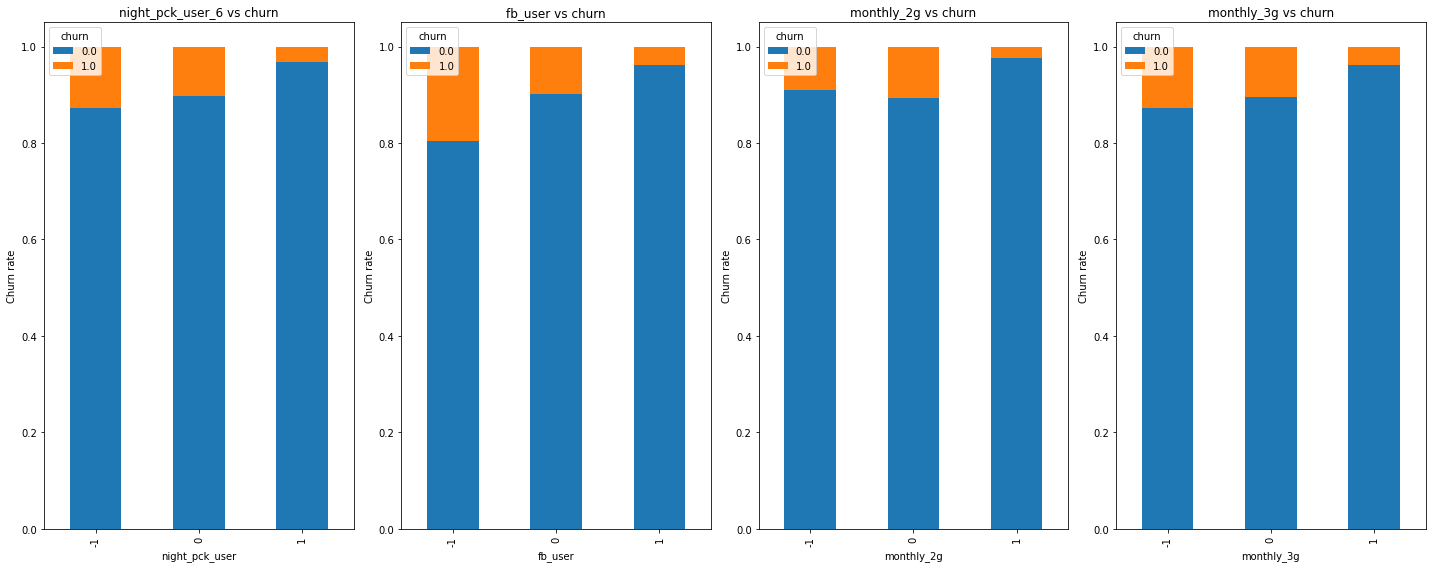

In [224]:
#HV_telecom['night_pck_user'] = HV_telecom.night_pck_user.apply(lambda x: 0 if x<=0 else 1)

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,4,1)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.night_pck_user,HV_telecom.churn,normalize='index').plot(kind='bar',title='night_pck_user_6 vs churn', stacked=True, ax=ax1)

ax1 = plt.subplot(1,4,2)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.fb_user,HV_telecom.churn,normalize='index').plot(kind='bar',title='fb_user vs churn',stacked=True, ax=ax1)

ax1 = plt.subplot(1,4,3)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.monthly_2g,HV_telecom.churn,normalize='index').plot(kind='bar',title='monthly_2g vs churn',stacked=True, ax=ax1)

ax1 = plt.subplot(1,4,4)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.monthly_3g,HV_telecom.churn,normalize='index').plot(kind='bar',title='monthly_3g vs churn',stacked=True, ax=ax1)

plt.tight_layout()
plt.show()

**<font color='green'>Analysis:</font>** **churn rate** is high if the usage trend for fb_user/night_pack is negative.

### Comparison of Good phase vs Action phase

In [225]:
col_avg = []
for c in range (0,len(columns_6)):
    col_avg.append(columns_6[c][:-2]+'_avg')
    HV_telecom[col_avg[c]] = (HV_telecom[columns_6[c]] + HV_telecom[columns_7[c]])/2

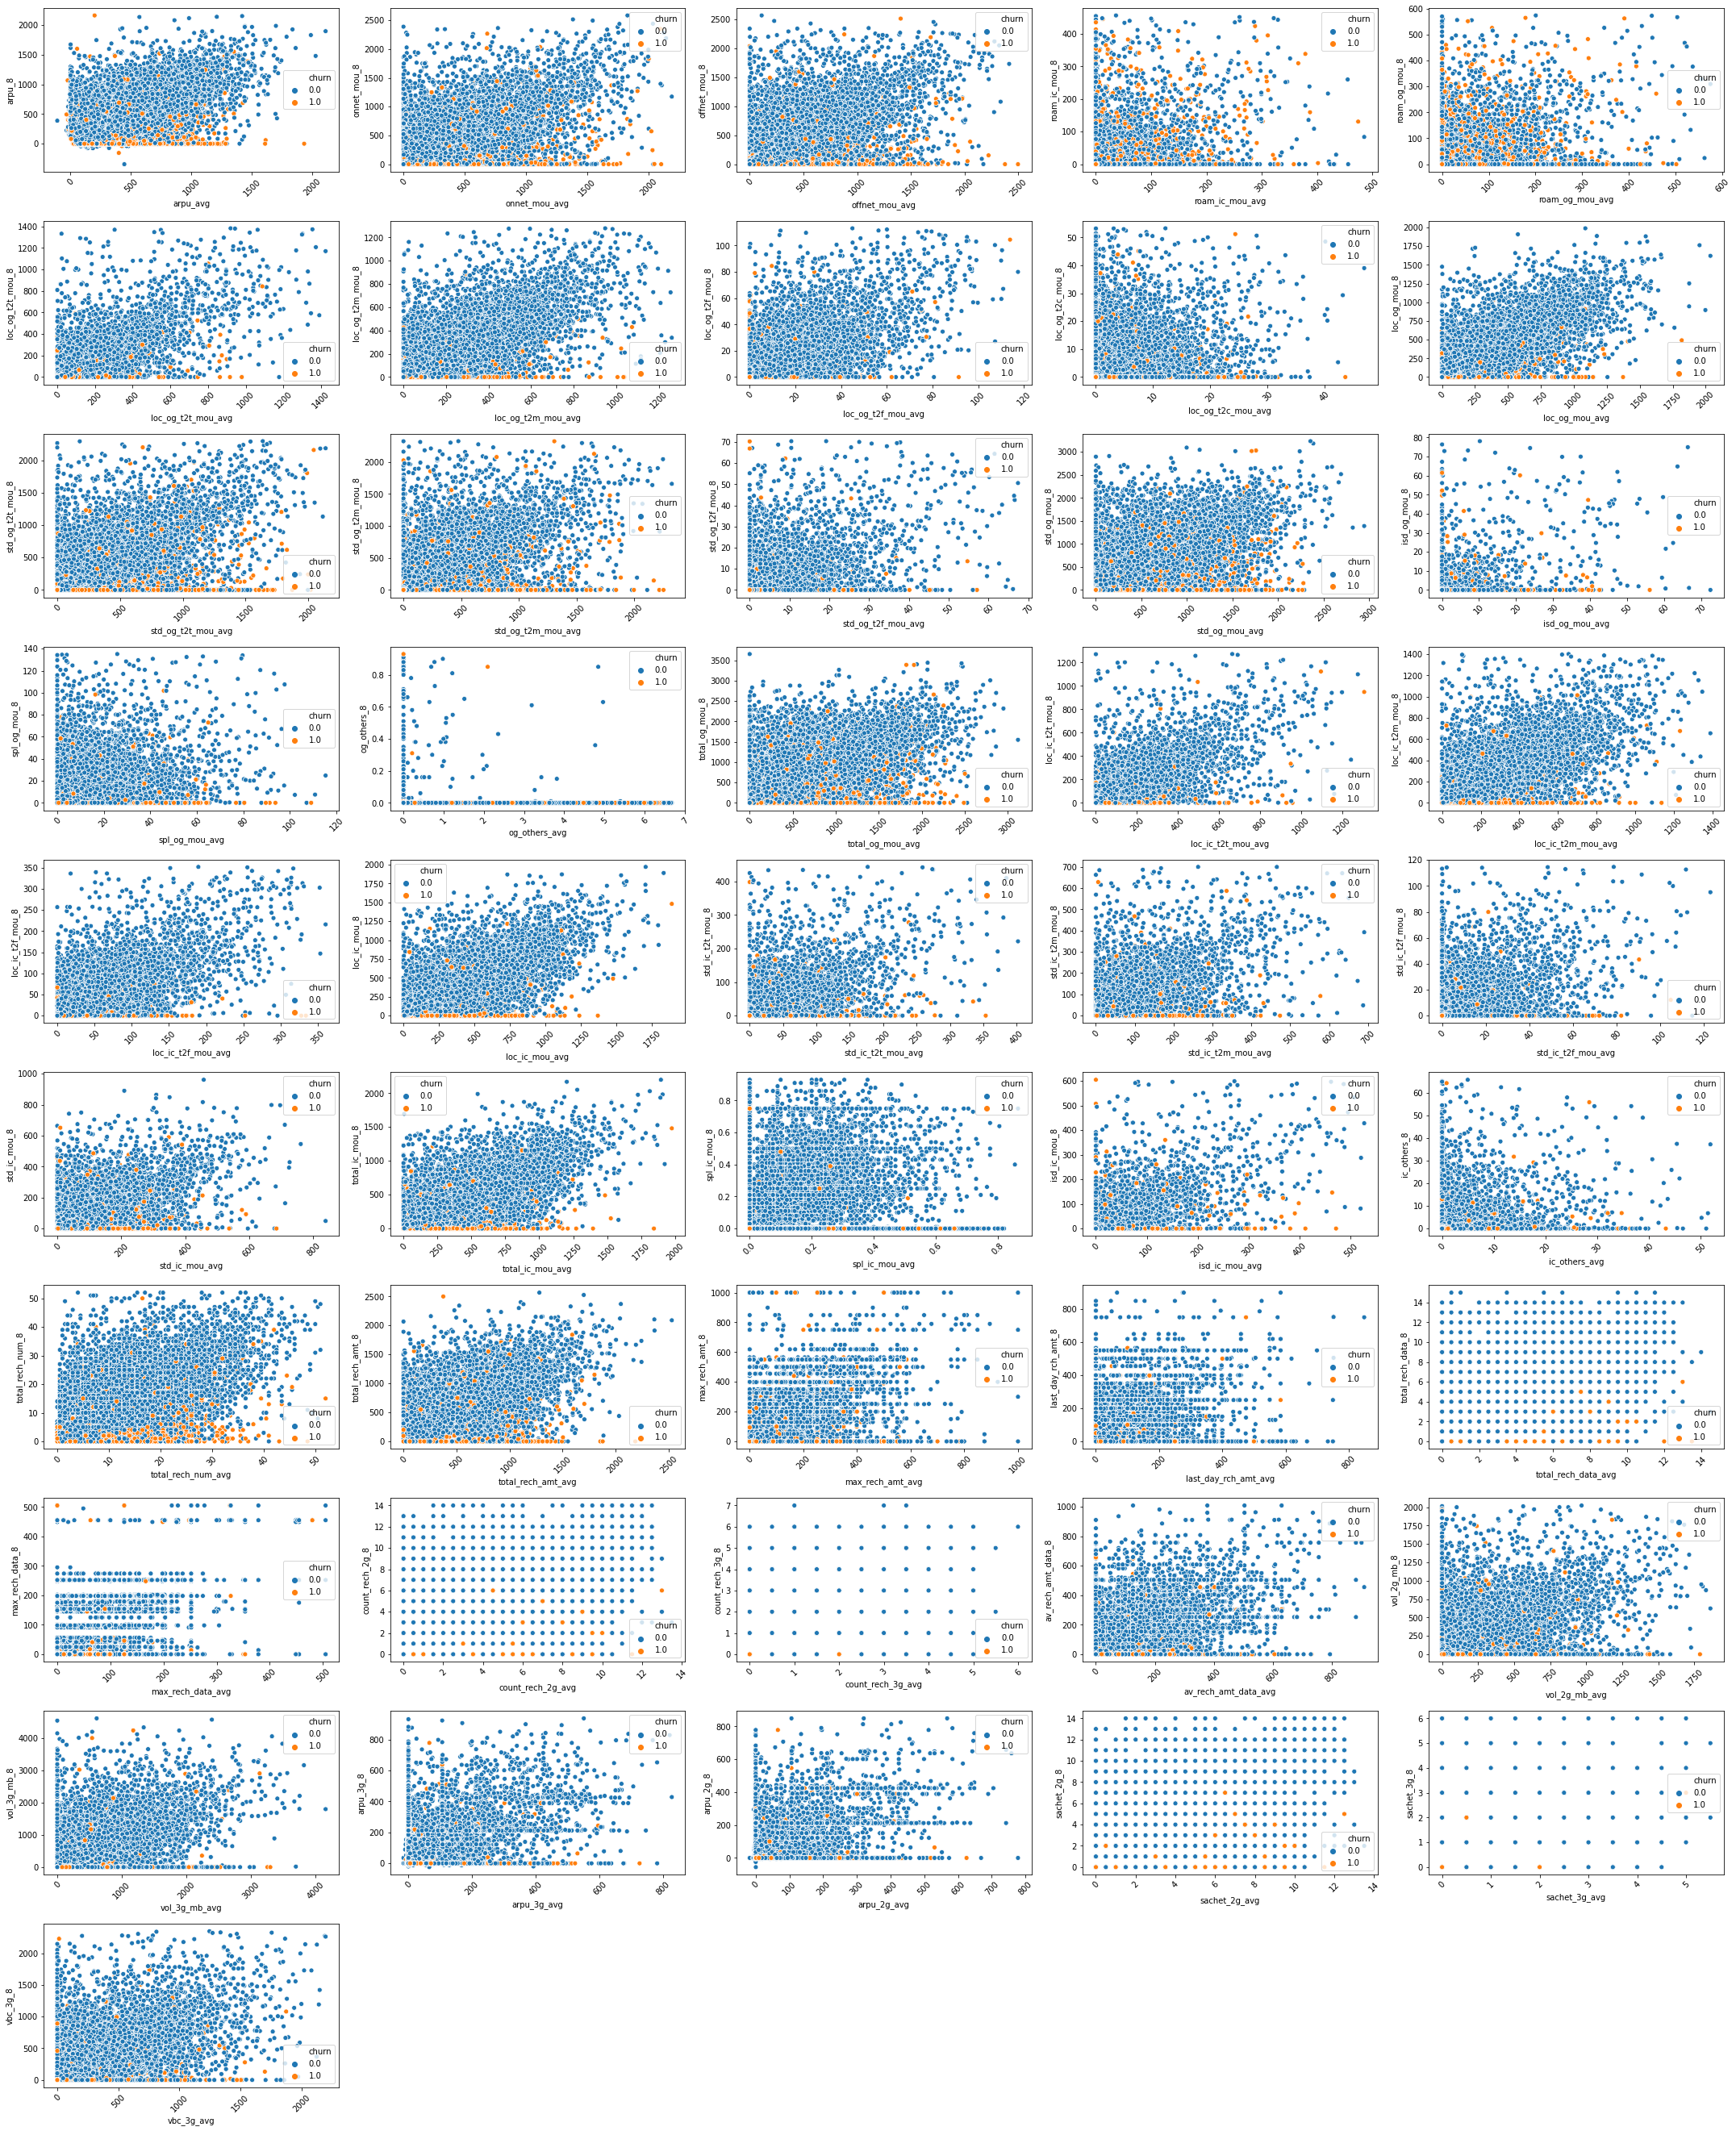

In [226]:
plt.figure(figsize=(30.0,(len(columns_8)/5)*4))
for n in range(1,len(columns_8)+1):
    mscatterplot(df=HV_telecom,x_colname=col_avg[n-1],y_colname=columns_8[n-1] ,hue_colname='churn',pltnum=n,listlen=len(columns_8)+1)

plt.tight_layout()
plt.show()

##Drop all the _avg columns created
HV_telecom.drop(columns=col_avg,inplace=True)

**<font color='green'>Analysis:</font>**
There are many features as below shows that `decline in mou or rech amount/number` in **Action phase** as compared to **Good phase**. It means that we can  expect some of these features as important features to decide if customer is going to `churn` or not.<br>
Features like :- <br>
**onnet_mou_, offnet_mou_, roam_og_mou_, loc_og_mou_, std_og_t2t_mou_, std_og_t2m_mou_, std_og_mou_avg_, total_og_mou, loc_ic_t2t_mou_, loc_ic_t2m_mou_, loc_ic_mou_, total_ic_mou_,total_rech_num_, sachet_2g_**

### Month vs Incoming & Outgoing calls

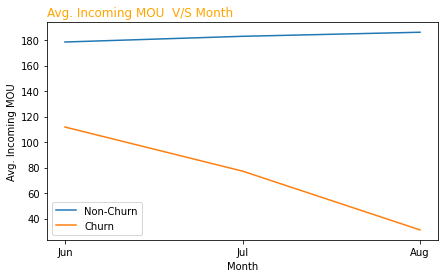

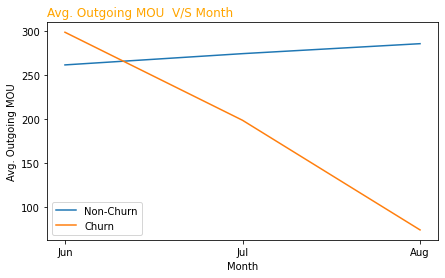

In [227]:
# Plotting month vs incoming and outcomings call
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

**<font color='green'>Analysis:</font>**
- We can see that in the month of June the minutes of incoming and outcoming calls are high and further decreases
- There is a huge fall after July 
- The fall is more for outcoming calls compared to the incoming calls
- Incoming calls minute is all time greater for non-churn as compared to the customer considered as churn
- But for outgoing the calls minute is higher at start and then falls significantly

### Month vs Standard and Local outgoing calls

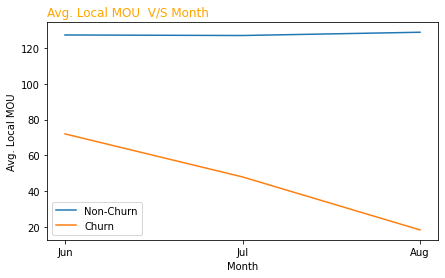

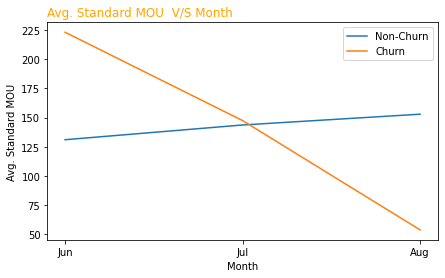

In [228]:
loc_og_col = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
std_og_col = ['std_og_mou_6','std_og_mou_7','std_og_mou_8']
plot_byChurnMou(loc_og_col,'Local')
plot_byChurnMou(std_og_col,'Standard')

**<font color='green'>Analysis:</font>**
- We can clearly see that customers who churn are mostly use standard call
- And there is a drastic fall in mou for customer who churn
- Maybe company is not providing best plans for standard calls and customer are finding better plans with competitors

### Month vs outgoing roaming calls

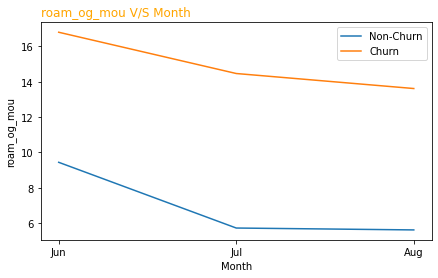

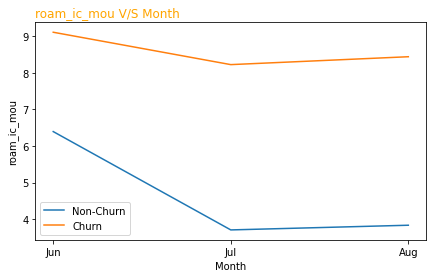

In [229]:
#Plotting outgoing vs incoming
plot_byChurn(HV_telecom,'roam_og_mou')
plot_byChurn(HV_telecom,'roam_ic_mou')

**<font color='green'>Analysis:</font>**
- We can see that roaming is one of the major factor for customers churn 
- High incoming and outcoming mou are leading to high customer churn rate
- This is maybe company has imposed high tariff on roaming calls and customers are unhappy with the rates leading to churning

### Correlation Matrix of the features

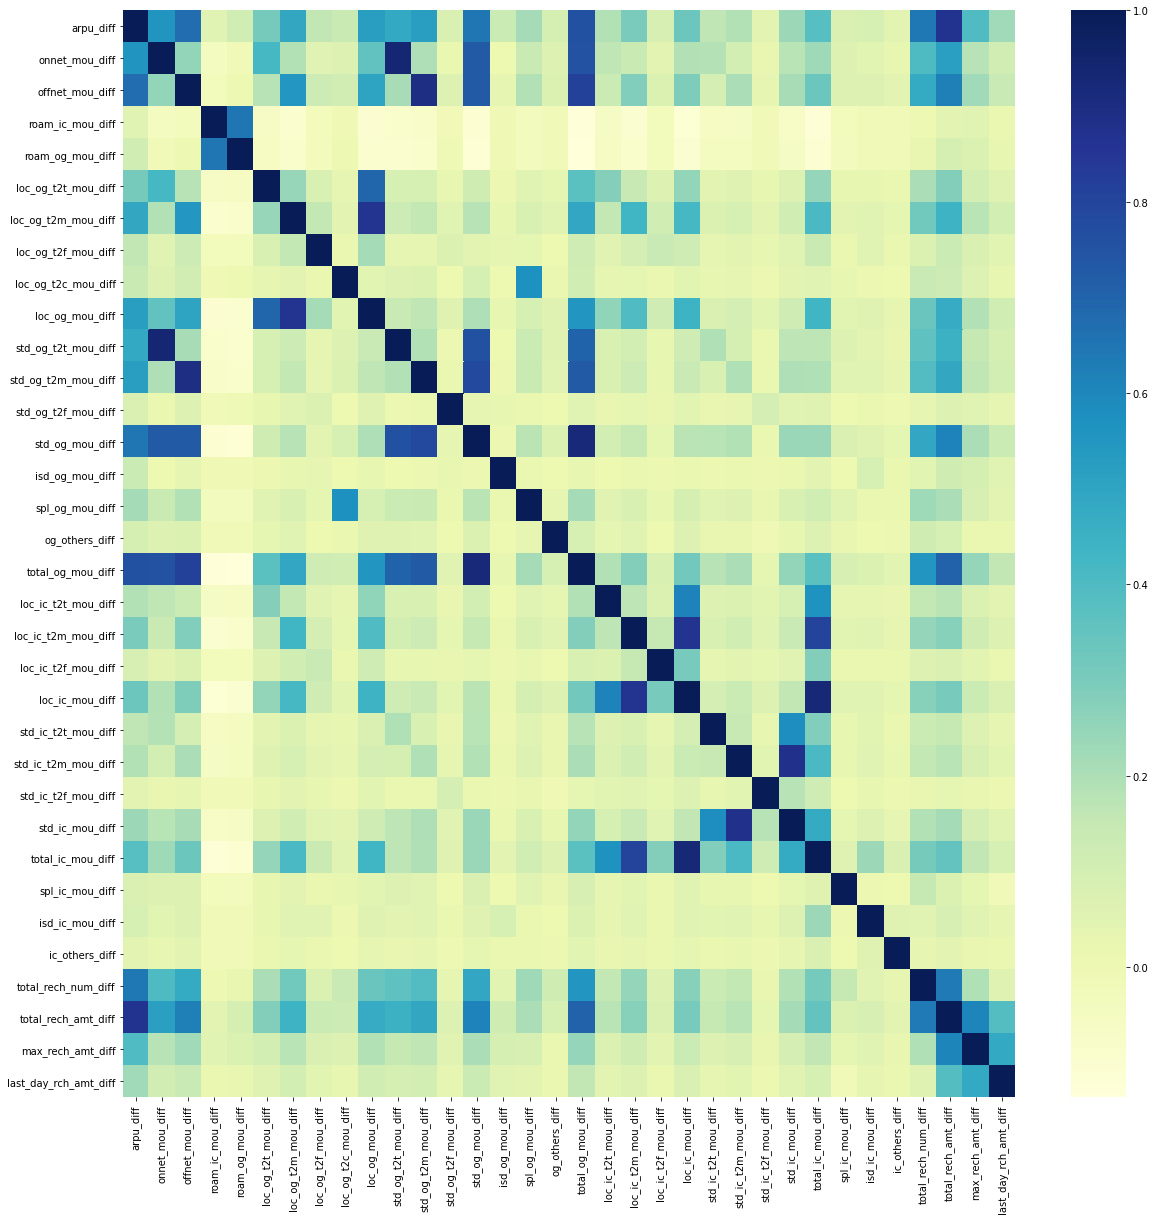

In [230]:
plt.figure(figsize=(20, 20))

columns_corr = [col for col in HV_telecom_diff.columns if (('_diff' in col) and ('_2g' not in col) and ('_3g' not in col) and ('_data' not in col))]
sns.heatmap(HV_telecom_diff[columns_corr].corr(),  cmap="YlGnBu")
plt.show()

In [231]:
HV_telecom_diff[['recency_ap','recency_data_ap', 'aon', 'churn']] = HV_telecom[['recency_ap','recency_data_ap', 'aon', 'churn']]
HV_telecom_diff.shape
display(HV_telecom_diff.describe())

arpu_diff    arpu_trend  onnet_mou_diff  onnet_mou_trend  \
count  90066.000000  90066.000000    90066.000000     90066.000000   
mean      -1.377332      0.476006       -1.181551         0.471465   
std      178.643811      0.499427      159.073198         0.499188   
min    -1932.651000      0.000000    -2102.210000         0.000000   
25%      -80.743000      0.000000      -21.035000         0.000000   
50%       -5.563000      0.000000       -0.775000         0.000000   
75%       72.519375      1.000000       14.830000         1.000000   
max     1961.859000      1.000000     2390.235000         1.000000   

       offnet_mou_diff  offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  \
count     90066.000000      90066.000000      90066.000000       90066.000000   
mean         -2.999428          0.466269         -1.114747           0.794495   
std         181.598387          0.498864         25.830888           0.404072   
min       -2496.280000          0.000000       -456.385000           0.000000   
25%         -44.715000          0.000000          0.000000           1.000000   
50%          -2.980000          0.000000          0.000000           1.000000   
75%          34.045000          1.000000          0.000000           1.000000   
max        2459.415000          1.000000        454.690000           1.000000   

       roam_og_mou_diff  roam_og_mou_trend  loc_og_t2t_mou_diff  \
count      90066.000000       90066.000000         90066.000000   
mean          -1.971187           0.790332            -1.172923   
std           35.208322           0.407074            54.250686   
min         -538.135000           0.000000         -1176.940000   
25%            0.000000           1.000000            -8.260000   
50%            0.000000           1.000000            -0.215000   
75%            0.000000           1.000000             5.890000   
max          570.780000           1.000000          1310.490000   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  \
count          90066.000000         90066.000000          90066.000000   
mean               0.484700            -1.482310              0.479493   
std                0.499769            77.050962              0.499582   
min                0.000000         -1037.475000              0.000000   
25%                0.000000           -20.575000              0.000000   
50%                0.000000            -0.700000              0.000000   
75%                1.000000            16.443750              1.000000   
max                1.000000          1136.330000              1.000000   

       loc_og_t2f_mou_diff  loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  \
count         90066.000000          90066.000000         90066.000000   
mean             -0.109213              0.657185             0.145775   
std               6.052367              0.474653             4.022823   
min             -91.430000              0.000000           -43.625000   
25%              -0.540000              0.000000             0.000000   
50%               0.000000              1.000000             0.000000   
75%               0.000000              1.000000             0.000000   
max             101.135000              1.000000            53.210000   

       loc_og_t2c_mou_trend  loc_og_mou_diff  loc_og_mou_trend  \
count          90066.000000     90066.000000      90066.000000   
mean               0.759188        -2.764587          0.478516   
std                0.427579       105.605284          0.499541   
min                0.000000     -1373.410000          0.000000   
25%                1.000000       -29.658750          0.000000   
50%                1.000000        -1.115000          0.000000   
75%                1.000000        23.250000          1.000000   
max                1.000000      1484.140000          1.000000   

       std_og_t2t_mou_diff  std_og_t2t_mou_trend  std_og_t2m_mou_diff  \
count         90066.000000          90066.000000    

### Dummy Variable generation for categorical features

In [232]:
dummy_df = pd.get_dummies(data=HV_telecom[columns_cat_new],columns=columns_cat_new,drop_first=True)
HV_telecom_diff = pd.concat([HV_telecom_diff,dummy_df],axis=1)
HV_telecom_diff.shape
display(HV_telecom_diff.describe())

arpu_diff    arpu_trend  onnet_mou_diff  onnet_mou_trend  \
count  90066.000000  90066.000000    90066.000000     90066.000000   
mean      -1.377332      0.476006       -1.181551         0.471465   
std      178.643811      0.499427      159.073198         0.499188   
min    -1932.651000      0.000000    -2102.210000         0.000000   
25%      -80.743000      0.000000      -21.035000         0.000000   
50%       -5.563000      0.000000       -0.775000         0.000000   
75%       72.519375      1.000000       14.830000         1.000000   
max     1961.859000      1.000000     2390.235000         1.000000   

       offnet_mou_diff  offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  \
count     90066.000000      90066.000000      90066.000000       90066.000000   
mean         -2.999428          0.466269         -1.114747           0.794495   
std         181.598387          0.498864         25.830888           0.404072   
min       -2496.280000          0.000000       -456.385000           0.000000   
25%         -44.715000          0.000000          0.000000           1.000000   
50%          -2.980000          0.000000          0.000000           1.000000   
75%          34.045000          1.000000          0.000000           1.000000   
max        2459.415000          1.000000        454.690000           1.000000   

       roam_og_mou_diff  roam_og_mou_trend  loc_og_t2t_mou_diff  \
count      90066.000000       90066.000000         90066.000000   
mean          -1.971187           0.790332            -1.172923   
std           35.208322           0.407074            54.250686   
min         -538.135000           0.000000         -1176.940000   
25%            0.000000           1.000000            -8.260000   
50%            0.000000           1.000000            -0.215000   
75%            0.000000           1.000000             5.890000   
max          570.780000           1.000000          1310.490000   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  \
count          90066.000000         90066.000000          90066.000000   
mean               0.484700            -1.482310              0.479493   
std                0.499769            77.050962              0.499582   
min                0.000000         -1037.475000              0.000000   
25%                0.000000           -20.575000              0.000000   
50%                0.000000            -0.700000              0.000000   
75%                1.000000            16.443750              1.000000   
max                1.000000          1136.330000              1.000000   

       loc_og_t2f_mou_diff  loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  \
count         90066.000000          90066.000000         90066.000000   
mean             -0.109213              0.657185             0.145775   
std               6.052367              0.474653             4.022823   
min             -91.430000              0.000000           -43.625000   
25%              -0.540000              0.000000             0.000000   
50%               0.000000              1.000000             0.000000   
75%               0.000000              1.000000             0.000000   
max             101.135000              1.000000            53.210000   

       loc_og_t2c_mou_trend  loc_og_mou_diff  loc_og_mou_trend  \
count          90066.000000     90066.000000      90066.000000   
mean               0.759188        -2.764587          0.478516   
std                0.427579       105.605284          0.499541   
min                0.000000     -1373.410000          0.000000   
25%                1.000000       -29.658750          0.000000   
50%                1.000000        -1.115000          0.000000   
75%                1.000000        23.250000          1.000000   
max                1.000000      1484.140000          1.000000   

       std_og_t2t_mou_diff  std_og_t2t_mou_trend  std_og_t2m_mou_diff  \
count         90066.000000          90066.000000    

# **<font color=blue> 6. Model building preparation </font>**

## 6.1 Divide data in Train and Test sets

In [233]:
X = HV_telecom_diff.drop(columns='churn')
y = HV_telecom_diff['churn']
X_columns = X.columns
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
display(X.shape)
display(y.shape)

(90066, 103)

(90066,)

In [234]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.values
y_test = y_test.values
display(y_train.shape)

(63046,)

### 6.2 Scale the train and test data

In [235]:
X_cat_cols = list(dummy_df.columns.values) + columns_cat_trend
X_num_cols = X_train.drop(X_cat_cols,axis=1).columns.tolist()

SS = StandardScaler() # Use standard scaler for scaling continous features
X_train = pd.concat([X_train[X_cat_cols],pd.DataFrame(SS.fit_transform(X_train.drop(X_cat_cols, axis=1)))], axis=1)
X_test = pd.concat([X_test[X_cat_cols],pd.DataFrame(SS.transform(X_test.drop(X_cat_cols, axis=1)))], axis=1)

X_train.columns = X_cat_cols+X_num_cols
X_test.columns = X_cat_cols+X_num_cols

In [236]:
#display(X_train_ss.shape)
display(X_train.shape)
display(round(X_train.describe(),2))

(63046, 103)

night_pck_user_0  night_pck_user_1  fb_user_0  fb_user_1  monthly_2g_0  \
count          63046.00          63046.00   63046.00   63046.00       63046.0   
mean               0.99              0.00       0.82       0.09           0.9   
std                0.09              0.06       0.39       0.29           0.3   
min                0.00              0.00       0.00       0.00           0.0   
25%                1.00              0.00       1.00       0.00           1.0   
50%                1.00              0.00       1.00       0.00           1.0   
75%                1.00              0.00       1.00       0.00           1.0   
max                1.00              1.00       1.00       1.00           1.0   

       monthly_2g_1  monthly_3g_0  monthly_3g_1  arpu_trend  onnet_mou_trend  \
count      63046.00      63046.00      63046.00    63046.00         63046.00   
mean           0.04          0.92          0.03        0.48             0.47   
std            0.20          0.26          0.18        0.50             0.50   
min            0.00          0.00          0.00        0.00             0.00   
25%            0.00          1.00          0.00        0.00             0.00   
50%            0.00          1.00          0.00        0.00             0.00   
75%            0.00          1.00          0.00        1.00             1.00   
max            1.00          1.00          1.00        1.00             1.00   

       offnet_mou_trend  roam_ic_mou_trend  roam_og_mou_trend  \
count          63046.00            63046.0           63046.00   
mean               0.47                0.8               0.79   
std                0.50                0.4               0.41   
min                0.00                0.0               0.00   
25%                0.00                1.0               1.00   
50%                0.00                1.0               1.00   
75%                1.00                1.0               1.00   
max                1.00                1.0               1.00   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_trend  loc_og_t2f_mou_trend  \
count              63046.00              63046.00              63046.00   
mean                   0.49                  0.48                  0.66   
std                    0.50                  0.50                  0.47   
min                    0.00                  0.00                  0.00   
25%                    0.00                  0.00                  0.00   
50%                    0.00                  0.00                  1.00   
75%                    1.00                  1.00                  1.00   
max                    1.00                  1.00                  1.00   

       loc_og_t2c_mou_trend  loc_og_mou_trend  std_og_t2t_mou_trend  \
count              63046.00          63046.00              63046.00   
mean                   0.76              0.48                  0.67   
std                    0.43              0.50                  0.47   
min                    0.00              0.00                  0.00   
25%                    1.00              0.00                  0.00   
50%                    1.00              0.00                  1.00   
75%                    1.00              1.00                  1.00   
max                    1.00              1.00                  1.00   

       std_og_t2m_mou_trend  std_og_t2f_mou_trend  std_og_mou_trend  \
count              63046.00              63046.00          63046.00   
mean                   0.56                  0.87              0.53   
std                    0.50                  0.33              0.50   
min                    0.00                  0.00              0.00   
25%                    0.00                  1.00              0.00   
50%                    1.00                  1.00              1.00   
75%                    1.00                  1.00              1.00   
max                    1.00                  1.00              1.00   

       isd_og_

## 6.3 Apply PCA

- Transforming original dataset to reduced dimesion with PCA retaining 95% of variance

In [237]:
pca = PCA(n_components=0.95,random_state=42)
Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.transform(X_test)
print(' No of components after PCA :', pca.n_components_)

 No of components after PCA : 48


#### Making the scree plot

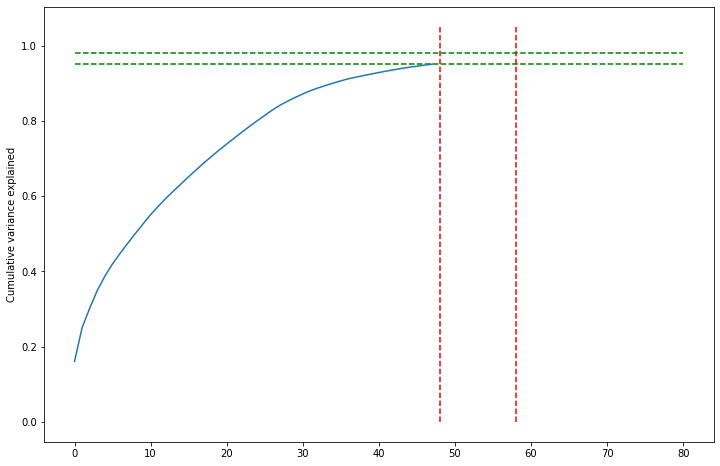

In [238]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_).round(4))
plt.vlines(x=48,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.vlines(x=58,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.hlines(y=0.95,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.hlines(y=0.98,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.ylabel("Cumulative variance explained")
plt.show()

### <font color='green'> **Model Evaluation Crtiteria** </font>

Following Criterion would be used during model evaluations:- 
- During cross-validation following evaluation metrics are generated `['recall','precision', 'accuracy', 'f1']`
- Best `recall/sensitivity` model is selected because accuracy of churn prediction has higher importance, but it is ensure that this selection does not lead to very high false-positive rate by observing f1_score
- For f1_score, a cutoff of about 0.3-0.5 appears to give the best predictive performance. It is intuitive that the cutoff is less than 0.5 because the training data contains many fewer examples of `churn`

Reference:
https://www.kdnuggets.com/2016/04/unbalanced-classes-svm-random-forests-python.html/2

## 6.4 Models with PCA

<font color='orange'> *** Please note that we have commented different parameters values used during parameter tuning as it takes long time to complete the execution ***</font>

### Resampling of dataset - for handling class imbalance

**Remarks**
- After resampling the dataset, it is found that the models are getting `overfitted` to resampled training data. Parameter tuning using GridSerchCV (Holdout test data is also part of resampled data) is also not reliable due to this issue. 
- Cross-validation results were good, but the same model was `not performing well on test data`. Due to this issue instead of resampling techniques, `class_weight` parameter is preferred for  handling Class imbalance

### <font color='green'> ***6.4.1 XGBoost*** </font>

**XGBoost** algorithm is a modification of the Gradient Boosting tree algorithm but it uses a more regularized model formulation to control overfitting, which gives it better performance, which is why it’s also known as ‘regularized boosting‘ technique.

- Objective Function : Training Loss + Regularization
Loss function controls the predictive power of the algorithm and regularization controls its simplicity

#### **Hyper parameter tuning:**
There are mainly 3 parameters to tune the model:
'learning_rate':[0.001,0.005,0.01,0.05],
'max_depth': [3,4,5],
'reg_alpha':[0.01,0.1,1,10,100],
'reg_lambda':[0.01,0.1,1,10],              

**1. leraning_rate & n_estimators***: Below learning rates were used with other parameters keeping at default values to check best combination of learning rate and n_estimators. 
- With lower learning rate, higher number of n_estimators are required to reach global minima.

learning_rate: 0.001,0.005,0.01,0.05,0.1,0.5,1

n_estimators: range(10,200,10)

**2. max_depth***: It is used to **control over-fitting*** as higher depth will allow model to learn relations very specific to a particular sample.
- max_depth tried were in range(3,12,1) 

***3. gamma***: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
- gamma values tried in range 0 to 0.4 were tried and best value was kept for modelling

**4. reg_alpha & reg_lambda:** 
- L1 regularization term on weight (analogous to Lasso regression). It can be used in case of very high dimensionality so that the algorithm runs faster when implemented
- L2 regularization term on weights (analogous to Ridge regression)
- Below combinations were tried to tune the model but it seems default values of 0 and 1 respectively works better.
'reg_alpha':[0.01,0.1,1,10,100],
'reg_lambda':[0.01,0.1,1,10],

**scale_pos_weight:**
- **Imbalance** in classes is handled by `scale_pos_weight` parameter
- Prediction accuracy of churn customer is more important than prediction accuracy of non-churn customers, so this pupose scale_pos_weight' : `[16]` is used instead of `balanced` option

In [239]:
# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = { #'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1],
              'learning_rate':[0.01],
              #'max_depth': range(3,11,1),
              'max_depth': [8],
              #'n_estimators':range(100,1200,100),
              'n_estimators': [100],
              #'gamma': [0,0.1,0.2,0.3,0.4],
              'gamma': [0],
              #'reg_alpha':[0.01,0.1,1,10,100],
              #'reg_lambda':[0.01,0.1,1,10],   
              'scale_pos_weight': [16] 
             }

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['recall','precision', 'accuracy', 'f1']
xgb = XGBClassifier(random_state=42)

# set up GridSearchCV()
model_cv_xgb = GridSearchCV(estimator = xgb,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='recall',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True) 

model_cv_xgb.fit(Xtrain_reduced, y_train)
cv_result_xgb =pd.DataFrame(model_cv_xgb.cv_results_)
display(cv_result_xgb)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[20:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0, learning_rate=0.01, max_depth=10, n_estimators=200, scale_pos_weight=16; accuracy: (train=0.907, test=0.857) f1: (train=0.686, test=0.524) precision: (train=0.525, test=0.398) recall: (train=0.993, test=0.764) total time= 1.9min
[20:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0, learning_rate=0.01, max_depth=10, n_estimators=2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0     106.203827      5.588022         0.066975          0.0105           0   

  param_learning_rate param_max_depth param_n_estimators  \
0                0.01              10                200   

  param_scale_pos_weight                                             params  \
0                     16  {'gamma': 0, 'learning_rate': 0.01, 'max_depth...   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0            0.764114            0.758514            0.779412   

   split3_test_recall  split4_test_recall  mean_test_recall  std_test_recall  \
0            0.756192            0.777864          0.767219         0.009685   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1             0.992647              0.99497   

   split2_train_recall  split3_train_recall  split4_train_recall  \
0             0.992648              0.99052             0.995357   

   mean_train_recall  std_train_recall  split0_test_precision  \
0           0.993229          0.001765               0.398227   

   split1_test_precision  split2_test_precision  split3_test_precision  \
0               0.394208               0.416288               0.406914   

   split4_test_precision  mean_test_precision  std_test_precision  \
0               0.409702             0.405068            0.007944   

   rank_test_precision  split0_train_precision  split1_train_precision  \
0                    1                0.524647                  0.5256   

   split2_train_precision  split3_train_precision  split4_train_precision  \
0                0.522027                0.521385                0.523451   

   mean_train_precision  std_train_precision  split0_test_accuracy  \
0              0.523422             0.001571              0.857415   

   split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0              0.855817              0.865414              0.862083   

   split4_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0                0.8624            0.860626           0.003511   

   rank_test_accuracy  split0_train_accuracy  split1_train_accuracy  \
0                   1                0.90709               0.907449   

   split2_train_accuracy  split3_train_accuracy  split4_train_accuracy  \
0               0.906101               0.905843               0.906656   

   mean_train_accuracy  std_train_accuracy  split0_test_f1  split1_test_f1  \
0             0.906628            0.000597        0.523582        0.518793   

   split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  \
0        0.542711        0.529109        0.536716      0.530182      0.00865   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             1         0.686471         0.687843         0.684225   

   split3_train_f1  split4_train_f1  mean_train_f1  std_train_f1  
0         0.683168         0.686091        0.68556      0.001663


 Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=16, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[20:17:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.987

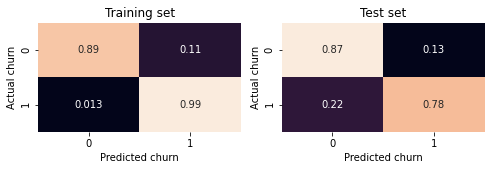

In [240]:
### SELECT BEST ESTIMATOR###
xgb_best = model_cv_xgb.best_estimator_
print("\n Best Estimator:",xgb_best)
xgb_best.fit(Xtrain_reduced, y_train)

### PREDICT Churn rate ###
y_train_pred = xgb_best.predict(Xtrain_reduced)
y_test_pred = xgb_best.predict(Xtest_reduced)

model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred)

### <font color='green'> ***6.4.2 RandomForest*** </font>

Random forest classifier is an ensemble of Decision Tree classifier with bootstrapped agregation (bagging) method. Following hyper parameters are tuned for getting the best results based on evaluation criteria 

#### **Hyper parameter tuning:**
**n_estimators** represents number of trees in the foreset

'n_estimators': range(100,200,300)
 
**max_depth** , max number of levels in each decision tree, trucation parameter which limits the growth of the tree

'max_depth': [5,8, 10, 12]

**min_samples_split** ,The minimum number of samples required to split an internal node:

'min_samples_split': [500,750,1000]

**class_weight:**
- Imbalance in classes is handled by `class_weight` parameter
- Prediction accuracy of churn customer is more important than prediction accuracy of non-churn customers, so this pupose class_weight' : `[ {0:1, 1:16} ]` is used instead of `balanced` option

In [241]:
# Create the parameter grid based on the results of random search 
param_grid = { 
            # 'max_depth': [ 5,8, 10, 12],
              'max_depth': [10],
            #'min_samples_split': [500,750,1000],
             'min_samples_split': [750],     
            #'class_weight' : ['balanced', {0:1, 1:16}] ,      
             'class_weight' : [ {0:1, 1:16} ]  ,
            # 'n_estimators': range(100,500,100)
             'n_estimators': [200]
            }

#class_weight='balanced_subsample'
#folds = 5
folds = StratifiedKFold(n_splits=5)
scoring = ['recall','precision', 'accuracy', 'f1']

rf = RandomForestClassifier( random_state=42)
model_cv = GridSearchCV(estimator = rf, param_grid = param_grid,scoring=scoring, refit='recall', cv = folds, verbose =3, return_train_score=True)
model_cv.fit(Xtrain_reduced, y_train)
cv_result =pd.DataFrame(model_cv.cv_results_)
display(cv_result)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.742, test=0.740) f1: (train=0.419, test=0.405) precision: (train=0.272, test=0.265) recall: (train=0.908, test=0.863) total time=  46.9s
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.744, test=0.737) f1: (train=0.421, test=0.407) precision: (train=0.274, test=0.265) recall: (train=0.909, test=0.880) total time=  40.1s
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.740, test=0.743) f1: (train=0.418, test=0.413) precision: (train=0.271, test=0.269) recall: (train=0.912, test=0.882) total time=  40.2s
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, min_samples_split=750, n_estimators=200; accuracy: (train=0.748, test=0.734) f1: (train=0.425, test=0.399) precision: (train=0.277

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      41.206475      2.811951         0.325696        0.076954   

  param_class_weight param_max_depth param_min_samples_split  \
0      {0: 1, 1: 16}              10                     750   

  param_n_estimators                                             params  \
0                200  {'class_weight': {0: 1, 1: 16}, 'max_depth': 1...   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0            0.863109            0.880031            0.882353   

   split3_test_recall  split4_test_recall  mean_test_recall  std_test_recall  \
0            0.862229            0.882353          0.874015         0.009307   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1             0.907701              0.90888   

   split2_train_recall  split3_train_recall  split4_train_recall  \
0             0.911588              0.90946             0.908686   

   mean_train_recall  std_train_recall  split0_test_precision  \
0           0.909263          0.001293               0.264832   

   split1_test_precision  split2_test_precision  split3_test_precision  \
0               0.264542               0.269249               0.259492   

   split4_test_precision  mean_test_precision  std_test_precision  \
0                0.25618             0.262859             0.00455   

   rank_test_precision  split0_train_precision  split1_train_precision  \
0                    1                0.272163                0.274096   

   split2_train_precision  split3_train_precision  split4_train_precision  \
0                0.270929                0.277214                0.273479   

   mean_train_precision  std_train_precision  split0_test_accuracy  \
0              0.273576             0.002122              0.740285   

   split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0              0.737013              0.742565              0.733762   

   split4_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0              0.725434            0.735812           0.005983   

   rank_test_accuracy  split0_train_accuracy  split1_train_accuracy  \
0                   1               0.741811               0.743978   

   split2_train_accuracy  split3_train_accuracy  split4_train_accuracy  \
0               0.739536               0.747705               0.743244   

   mean_train_accuracy  std_train_accuracy  split0_test_f1  split1_test_f1  \
0             0.743255            0.002692        0.405302        0.406798   

   split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  \
0        0.412595        0.398926        0.397074      0.404139     0.005604   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             1         0.418765         0.421175         0.417712   

   split3_train_f1  split4_train_f1  mean_train_f1  std_train_f1  
0         0.424911         0.420426       0.420598      0.002476


------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.907
Test set: 0.868

------------Specificity (Non Churn Prediction Accuracy) score------------
train set: 0.725
test set: 0.727

------------Precision score------------
train set: 0.274
test set: 0.267

------------F1 score------------
train set: 0.421
test set: 0.409

------------Accuracy score------------
train set: 0.744
Test set: 0.741

------------Confusion Matrix------------


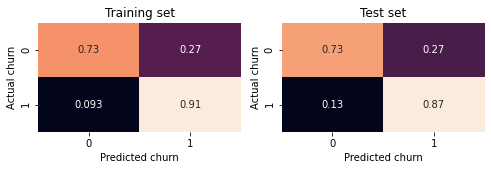

In [242]:
#--> Best estimator

clf_best = model_cv.best_estimator_
clf_best.fit(Xtrain_reduced, y_train)

y_train_pred = clf_best.predict(Xtrain_reduced)
y_pred = clf_best.predict(Xtest_reduced)

model_evaluation_plot(y_train,y_train_pred,y_test,y_pred)

### Handling class imbalance using SMOTE

In [243]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [244]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (113170, 103)
After OverSampling, the shape of train_y: (113170,) 

After OverSampling, counts of label '1': 56585
After OverSampling, counts of label '0': 56585
After OverSampling, churn event rate : 50.0% 



In [245]:
pca = PCA(0.95)
Xtrain_reduced = pca.fit_transform(X_train_res)
Xtest_reduced = pca.transform(X_test)
print(' No of components after PCA :', pca.n_components_)

 No of components after PCA : 46


#### Making the scree plot

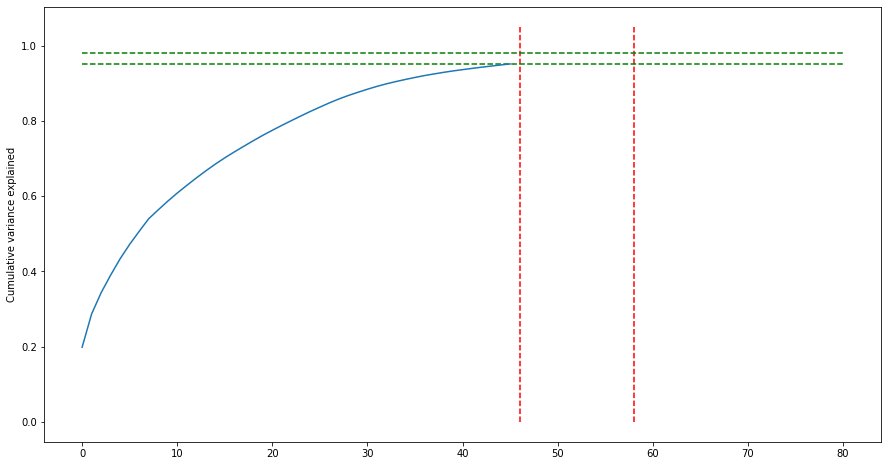

In [246]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_).round(4))
plt.vlines(x=46,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.vlines(x=58,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.hlines(y=0.95,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.hlines(y=0.98,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.ylabel("Cumulative variance explained")
plt.show()

In [247]:
pca_incremetal = IncrementalPCA(n_components = 46)
Xtrain_reduced = pca_incremetal.fit_transform(X_train_res)
Xtest_reduced = pca_incremetal.transform(X_test)

### <font color='green'> ***6.4.3 Random Forest Model with Incremental PCA*** </font>

In [248]:
# Create the parameter grid based on the results of random search 
param_grid = { 
            # 'max_depth': [ 8, 10, 12],
            'criterion':['gini','entropy'],
            #'min_samples_split': [500,750,1000],
             'min_samples_split': [750]     
            #'class_weight' : ['balanced', {0:1, 1:16}] ,      
            # 'n_estimators': range(100,500,100)
            }


#folds = 5
folds = StratifiedKFold(n_splits=5)
scoring = ['recall']

rf = RandomForestClassifier( random_state=42,class_weight='balanced',max_depth=10,n_estimators=200)
model_cv = GridSearchCV(estimator = rf, param_grid = param_grid,scoring=scoring, refit='recall', cv = folds,n_jobs=-1, verbose =3, return_train_score=True)
model_cv.fit(Xtrain_reduced, y_train_res)
cv_result =pd.DataFrame(model_cv.cv_results_)
display(cv_result)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     270.151444      8.294612         1.188858        0.070656   
1     325.488848     75.956170         0.871140        0.203902   

  param_criterion param_min_samples_split  \
0            gini                     750   
1         entropy                     750   

                                              params  split0_test_recall  \
0    {'criterion': 'gini', 'min_samples_split': 750}            0.800566   
1  {'criterion': 'entropy', 'min_samples_split': ...            0.799328   

   split1_test_recall  split2_test_recall  split3_test_recall  \
0            0.847840            0.842538            0.849960   
1            0.846249            0.842096            0.847486   

   split4_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0            0.850225          0.838226         0.019032                 1   
1            0.851727          0.837377         0.019271                 2   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0             0.850225             0.841124             0.844327   
1             0.849187             0.841102             0.843002   

   split3_train_recall  split4_train_recall  mean_train_recall  \
0             0.842715             0.842383           0.844155   
1             0.842251             0.843377           0.843784   

   std_train_recall  
0          0.003203  
1          0.002811


 Best Estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=750, n_estimators=200,
                       random_state=42)

------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.846
Test set: 0.755

------------Specificity (Non Churn Prediction Accuracy) score------------
train set: 0.876
test set: 0.873

------------Precision score------------
train set: 0.872
test set: 0.406

------------F1 score------------
train set: 0.859
test set: 0.528

------------Accuracy score------------
train set: 0.861
Test set: 0.861

------------Confusion Matrix------------


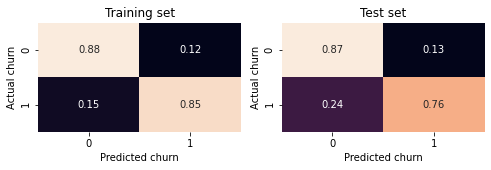

In [249]:
#--> Best estimator ###

rf2_best = model_cv.best_estimator_
print("\n Best Estimator:",rf2_best)
rf2_best.fit(Xtrain_reduced, y_train_res)

### PREDICT Churn rate ###
y_train_pred = rf2_best.predict(Xtrain_reduced)
y_test_pred = rf2_best.predict(Xtest_reduced)

model_evaluation_plot(y_train_res,y_train_pred,y_test,y_test_pred)

### Define functions for Graphs and Plots

**draw_roc**: This function is used to plot ROC curve<br>
**getModelMetrics**: This function is used to plot calulate the Model metrics <br>
**predictChurnWithProb**: This function is to predict the churn using the input probability cut-off<br>
**findOptimalCutoff**: This function is to find the optimal cutoff for classifing as churn/non-churn<br>
**modelfit**: This function is find the optimal cutoff for classifing as churn/non-churn<br>

In [250]:
#--> ROC curve definition of function for the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [251]:
#--> Definition of function for the Model Metrics

def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [252]:
#--> Function to predict the churn using the input probability cut-off

def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [253]:
#--> Function to find the optimal cutoff for classifing as churn/non-churn

def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [254]:
#--> Function to fit the model

def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#### Predicting churn with initial cut-off Probabilty=0.5

In [255]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf2_best,Xtrain_reduced,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8609967305823099
Sensitivity/Recall : 0.8455774498542017
Specificity: 0.8764160113104179
False Positive Rate: 0.12358398868958205
Positive predictive value: 0.8724835886214442
Negative Predictive value: 0.8501971541230927
sklearn precision score value: 0.8724835886214442


churn  churn_Prob  final_predicted
0    0.0    0.203519                0
1    0.0    0.127017                0
2    1.0    0.211493                0
3    1.0    0.335604                0
4    0.0    0.455299                0

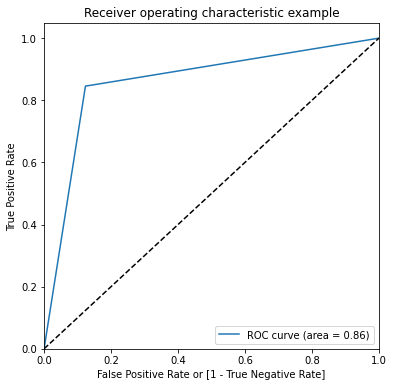

roc_auc_score : 0.86


In [256]:
#--> ROC curve
draw_roc(y_train_df.churn, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))


#### Finding optimal cut-off Probability

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.524662  0.999982  0.049342
0.2   0.2  0.673721  0.993497  0.353945
0.3   0.3  0.799532  0.962092  0.636971
0.4   0.4  0.847071  0.905629  0.788513
0.5   0.5  0.860997  0.845577  0.876416
0.6   0.6  0.845913  0.753468  0.938358
0.7   0.7  0.784704  0.599187  0.970222
0.8   0.8  0.695387  0.402810  0.987965
0.9   0.9  0.579677  0.161598  0.997756


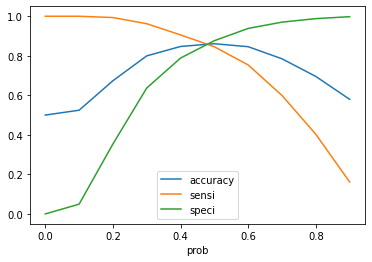

In [257]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

**As per the above graph 0.45 seems to be the optimal threshold** 

In [258]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(rf2_best,Xtrain_reduced,y_train_res,cut_off_prob)


Roc_auc_score : 0.856172130423257
Sensitivity/Recall : 0.8761332508615357
Specificity: 0.8362110099849783
False Positive Rate: 0.16378899001502165
Positive predictive value: 0.8424988104139759
Negative Predictive value: 0.8709825866067813
sklearn precision score value: 0.8424988104139759


churn  churn_Prob  final_predicted
0         0.0    0.203519                0
1         0.0    0.127017                0
2         1.0    0.211493                0
3         1.0    0.335604                0
4         0.0    0.455299                1
...       ...         ...              ...
113165    1.0    0.199795                0
113166    1.0    0.844200                1
113167    1.0    0.469149                1
113168    1.0    0.835781                1
113169    1.0    0.623214                1

[113170 rows x 3 columns]

In [259]:
# predicting with the choosen cut-off on test
predictChurnWithProb(rf2_best,Xtest_reduced,y_test,cut_off_prob)

Roc_auc_score : 0.8148396397759402
Sensitivity/Recall : 0.799928031666067
Specificity: 0.8297512478858133
False Positive Rate: 0.17024875211418672
Positive predictive value: 0.3500787401574803
Negative Predictive value: 0.9731011127237542
sklearn precision score value: 0.3500787401574803


churn  churn_Prob  final_predicted
0        0.0    0.186723                0
1        0.0    0.341786                0
2        0.0    0.096405                0
3        0.0    0.250343                0
4        0.0    0.162646                0
...      ...         ...              ...
27015    0.0    0.258354                0
27016    0.0    0.078600                0
27017    0.0    0.250230                0
27018    0.0    0.553153                1
27019    0.0    0.179595                0

[27020 rows x 3 columns]


### <font color='green'> ***6.4.4 Logistic Regression*** </font>

In [260]:
#-->  Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(class_weight='balanced')

In [261]:
modelfit(lr, Xtrain_reduced, y_train_res)


Model Report
Accuracy : 0.8063
Recall/Sensitivity : 0.7963
AUC Score (Train): 0.886438
CV Score : Mean - 0.8858216 | Std - 0.007936394 | Min - 0.8702236 | Max - 0.8920688


In [262]:
#--> predictions on Test data

pred_probs_test = lr.predict(Xtest_reduced)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.7735500682327556
Sensitivity/Recall : 0.7308384310903202
Specificity: 0.8162617053751908
False Positive Rate: 0.1837382946248092
Positive predictive value: 0.3131842713955281
Negative Predictive value: 0.9635743851960068
sklearn precision score value: 0.3131842713955281


In [263]:
#--> Model Metrics
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8074759437453738
Recall : 0.7308384310903202
Precision : 0.3131842713955281


In [264]:
#--> Making prediction on the test data
pred_probs_train = lr.predict_proba(Xtrain_reduced)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.89


In [265]:
#--> Initial threshold for LR 
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr,Xtrain_reduced,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.806256074931519
Sensitivity/Recall : 0.7963241141645312
Specificity: 0.8161880356985066
False Positive Rate: 0.18381196430149332
Positive predictive value: 0.8124628117055228
Negative Predictive value: 0.8002911157705037
sklearn precision score value: 0.8124628117055228


churn  churn_Prob  final_predicted
0    0.0    0.220387                0
1    0.0    0.052976                0
2    1.0    0.172695                0
3    1.0    0.238158                0
4    0.0    0.801418                1

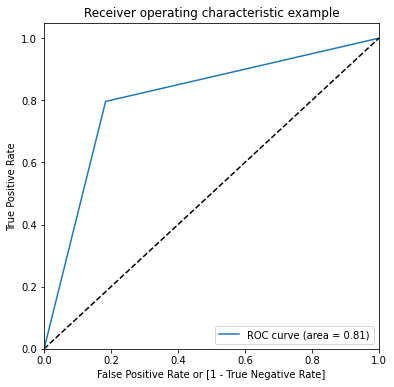

roc_auc_score : 0.81


In [266]:
#--> ROC curve
draw_roc(y_train_df.churn, y_train_df.final_predicted)
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.644800  0.985615  0.303985
0.2   0.2  0.731263  0.949227  0.513299
0.3   0.3  0.776487  0.904833  0.648140
0.4   0.4  0.799594  0.854537  0.744650
0.5   0.5  0.806256  0.796324  0.816188
0.6   0.6  0.800389  0.728373  0.872404
0.7   0.7  0.781161  0.645630  0.916692
0.8   0.8  0.737333  0.521587  0.953079
0.9   0.9  0.657657  0.334400  0.980914


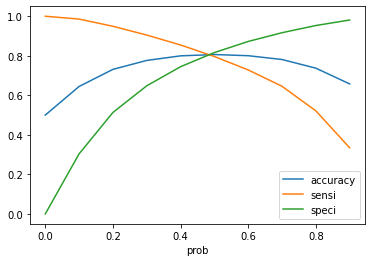

In [267]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [268]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr,Xtrain_reduced,y_train_res,cut_off_prob)

Roc_auc_score : 0.8047185649907219
Sensitivity/Recall : 0.8265087920827074
Specificity: 0.7829283378987364
False Positive Rate: 0.21707166210126358
Positive predictive value: 0.7919933616704204
Negative Predictive value: 0.8186034479572794
sklearn precision score value: 0.7919933616704204


churn  churn_Prob  final_predicted
0         0.0    0.220387                0
1         0.0    0.052976                0
2         1.0    0.172695                0
3         1.0    0.238158                0
4         0.0    0.801418                1
...       ...         ...              ...
113165    1.0    0.117590                0
113166    1.0    0.460944                1
113167    1.0    0.250936                0
113168    1.0    0.948948                1
113169    1.0    0.498484                1

[113170 rows x 3 columns]

In [269]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr,Xtest_reduced,y_test,cut_off_prob)

Roc_auc_score : 0.7751294022025053
Sensitivity/Recall : 0.7664627563871896
Specificity: 0.7837960480178211
False Positive Rate: 0.21620395198217895
Positive predictive value: 0.288970288970289
Negative Predictive value: 0.9669703292788437
sklearn precision score value: 0.288970288970289


churn  churn_Prob  final_predicted
0        0.0    0.015884                0
1        0.0    0.139959                0
2        0.0    0.281447                0
3        0.0    0.427090                0
4        0.0    0.255309                0
...      ...         ...              ...
27015    0.0    0.380998                0
27016    0.0    0.084733                0
27017    0.0    0.031664                0
27018    0.0    0.497731                1
27019    0.0    0.327041                0

[27020 rows x 3 columns]

**<font color='green'>Model Evaluation and Analysis:</font>**
- Based on `Recall/Sensitivity` and `F1` score **Random Forest** with `class_weight` balance seems to be performing better with best metrics

## 6.5 Model Building without PCA

- We will derive a model without PCA to identifying `important churn indicators` and `business recommendation`


### <font color='green'> ***6.5.1 RandomForest*** </font>

#### **Hyper parameter tuning:**

Random forest classifier is an ensemble of Decision Tree classifier with bootstrapped agregation (bagging) method. Following hyper parameters are tuned for getting the best results based on evaluation criteria 

**n_estimators** represents number of trees in the foreset

'n_estimators': range(100,500,100)
 
**max_features** , max number of features considered for splitting a node

'max_features': ['sqrt', 30,50,100,200]

**max_depth** , max number of levels in each decision tree, trucation parameter which limits the growth of the tree

'max_depth': [ 5, 8, 10, 12]

**min_samples_leaf** , min number of data points allowed in a leaf node, trucation parameter which limits the growth of the tree

'min_samples_leaf': range(50,500 ,50)

**class_weight:**
- Imbalance in classes is handled by `class_weight` parameter
- Prediction accuracy of churn customer is more important than prediction accuracy of non-churn customers, so this pupose class_weight' : `[ {0:1, 1:16} ]` is used instead of `balanced` option

In [ ]:
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {
    
    #  'max_depth': [ 8, 10, 12],
      'max_depth': [10],
    # 'max_features': ['sqrt', 30,50,100,200],
     'max_features': [100],
    # 'min_samples_leaf': range(50,100 ,50),
     'min_samples_leaf': [100],     
    # 'class_weight' : ['balanced', {0:1, 1:16}] ,           
     'class_weight' : [ {0:1, 1:16} ]  ,
    # 'n_estimators': range(100,500,50)
     'n_estimators': [200]
   
}

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['recall','precision', 'accuracy', 'f1']
rf2 = RandomForestClassifier( random_state=42,oob_score=True)

# set up GridSearchCV()

model_cv_rf2 = GridSearchCV(estimator = rf2,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='recall',
                        cv = folds,
                        verbose = 3,
                        return_train_score=True)                         
                
model_cv_rf2.fit(X_train, y_train)
cv_result_rf2 =pd.DataFrame(model_cv_rf2.cv_results_)
display(cv_result_rf2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=100, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.858, test=0.856) f1: (train=0.569, test=0.553) precision: (train=0.413, test=0.405) recall: (train=0.912, test=0.871) total time= 6.9min
[CV 2/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=100, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.861, test=0.849) f1: (train=0.573, test=0.542) precision: (train=0.418, test=0.393) recall: (train=0.912, test=0.871) total time= 6.9min
[CV 3/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=100, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.853, test=0.845) f1: (train=0.558, test=0.533) precision: (train=0.403, test=0.385) recall: (train=0.908, test=0.863) total time= 6.8min
[CV 4/5] END class_weight={0: 1, 1: 16}, max_depth=10, max_features=100, min_samples_leaf=100, n_estimators=200; accuracy: (train=0.85

In [ ]:
### SELECT BEST ESTIMATOR###
rf2_best = model_cv_rf2.best_estimator_
print("\n Best Estimator:",rf2_best)
rf2_best.fit(X_train, y_train)

### PREDICT Churn rate ###
y_train_pred = rf2_best.predict(X_train)
y_test_pred = rf2_best.predict(X_test)

model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred)

**<font color='green'>Model Comaprison and Analysis:</font>**

As observed, RandomForest without PCA is giving best results as compared to all the models with PCA. It may be because of below shortcomings of PCA technique.
- PCA produces the components to be perpendicular or orthogonal, though in some cases, that may not be the best solution. The alternative technique is to use Independent Components Analysis. 
- PCA assumes that columns with low variance are not useful, which might not be true in prediction setups (especially classification problem with a high class imbalance).

### 6.6 Identify Important churn indicators: 

In [ ]:
features = X_train.columns.tolist()
importance = rf2_best.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(15,8))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

## 7. Conclusions  

***7.1 Type I & Type II Error***
- The prediction model gives more importance for the reduction of `Type II Error` (missing to identify potential churn behaviour) because loosing high value customers can cause significant decline in the company revenue. 
- Although `Type I Error` (incorrectly identifing non-churn behaviour as churn) is relatively high, giving competitive offers to them will help company in longer run to generate more revenue as current focus is only on high value customers.

***7.2 Inferences & Strategies***

Below are the important churn indicator features and actionable recommendation based on the prediction model derived:

- A sudden reduction in total recharge amount(`total_rech_amnt_x`) or average revenue per user(`arpu_x`) generated from the user indicates a tendency of churn. This might due to unsatisfactory service quality or attractive offer from competitors, customer feedback needs to be collected and competitive offers need to be given based on customer value.


- An increased usage of roaming service(`roam_og_mou_x`, `roam_ic_mou_x`) leads to higher churn rate. This can be due to higher roaming charges and suggesting attractive roaming packages may reduce churn


- The derived recharge recency feature for voice and data (`recency_ap_x`, `recency_data_ap_x`) shows that customers are likely to churn if they do not charge for a period of 30-40 days. The recharge recency of customers needs to be regularly monitored and customer needs to be approached to get the customer feedback and concerns.


- Old customers are less likely to churn since they have developed trust over the service provider. New customers with Age on the network (`aon`)less than 2 years are more likely to churn and offering attractive packages at the initial months will develop loyalty and are like to continue with the service. 


- If there is a reduction in minutes of usage (incoming/outgoing calls in total/std/local for onnet/offnet), the customer shows a tendency of churn, and minutes of usage shall be tracked regularly. 
    (`total_og_mou_x, total_ic_mou_x, loc_ic_mou_x, loc_ic_t2m_mou_x, std_og_mou_x, std_ic_mou_x ....`)
    

## 8. Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 